In [6]:
import pandas as pd
import pickle
from scipy.stats import norm


In [7]:
pd.set_option('max_columns', 200)
pd.set_option('max_rows', 200)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from sklearn.metrics import roc_auc_score

In [10]:
import numpy as np
from sklearn.preprocessing import StandardScaler

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score 
from matplotlib import pyplot

In [12]:
from datetime import datetime

# 1. Priliminary data exploration

## 1.1Priliminary exploration on 'customer_service' data set

In [13]:
datafile = open("customer_service_reps", "rb")
customer_service = pickle.load(datafile)
datafile.close()
    

In [14]:
customer_service.reset_index()

,index,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
0,4,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,0,2019-11-26 03:30:29,2019-11-26 03:30:29,NaN
1,5,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,1,2019-11-26 03:30:29,2019-12-27 03:30:29,NaN
2,6,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,2,2019-12-27 03:30:29,2020-01-26 03:30:29,NaN
3,7,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,3,2020-01-26 03:30:29,NaT,NaN
4,8,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,0,2020-03-19 01:20:25,2020-04-02 01:20:25,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2208638,2248409,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,3,2019-08-27 20:23:27,2019-09-24 20:23:29,NaN
2208639,2248410,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,4,2019-09-24 20:23:29,2019-10-25 20:23:28,NaN
2208640,2248411,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,5,2019-10-25 20:23:28,2019-11-24 20:23:29,NaN
2208641,2248412,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,6,2019-11-24 20:23:29,2019-12-25 20:23:27,NaN


In [15]:
customer_service.shape

(2208643, 13)

In [16]:
customer_service['subid'].nunique()

1369360

In [17]:
cs = customer_service

In [18]:
##let us see which channels do we have
#we found that we have 3 channels: itunes, google and OTT
customer_service['billing_channel'].unique()

array(['itunes', 'google', 'OTT'], dtype=object)

In [19]:
customer_service.to_csv('customer_service.csv', encoding='utf_8_sig', index=True)

In [20]:
customer_service['revenue_net_1month'].isnull().sum

<bound method Series.sum of 4          False
5          False
6          False
7          False
8          False
           ...  
2248409    False
2248410    False
2248411    False
2248412    False
2248413    False
Name: revenue_net_1month, Length: 2208643, dtype: bool>

In [21]:
#check the distribution of 'revenue_net_1month', the majority of them is 0.
customer_service['revenue_net_1month'].value_counts(dropna=False)


 0.0000    860569
 1.1377    239321
 4.5875    228479
 3.5232    119462
 5.3215     78459
            ...  
-5.2481         1
-6.1656         1
-4.8077         1
-4.2205         1
-3.7801         1
Name: revenue_net_1month, Length: 286, dtype: int64

In [22]:
# replace the missing value of 'revenue_net_1month' with mean

customer_service['revenue_net_1month'] = customer_service['revenue_net_1month'].fillna(customer_service['revenue_net_1month'].mean())

In [23]:
# The mean of revenue_net_1month is 2.248 and almost 1/4 of the 'revenue_net_1month' data is 0
customer_service['revenue_net_1month'].describe()

count    2.208643e+06
mean     2.248010e+00
std      2.222221e+00
min     -7.596900e+00
25%      0.000000e+00
50%      1.137700e+00
75%      4.587500e+00
max      1.038610e+01
Name: revenue_net_1month, dtype: float64

In [ ]:
# I check 3 different channels: 'itunes', 'google' and 'OTT' separately

In [24]:
##For 'OTT' channel, the num_trail_days is either 14 or 0
customer_ott = customer_service[ customer_service['billing_channel'] == 'OTT']
customer_ott = customer_ott.reset_index(drop=True)
customer_ott['num_trial_days'].unique()


array([14,  0])

In [25]:
customer_ott.head(2)

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
0,33513851,28948735,False,2020-04-06 19:21:05,2020-03-27 23:59:39,14,False,OTT,0.0,0,2020-03-27 23:59:39,NaT,False
1,30034436,21697364,False,2020-04-08 13:16:39,2020-03-27 23:59:06,14,False,OTT,0.0,0,2020-03-28 00:05:20,NaT,False


In [26]:
#let's see how do the OTT subscribers look like? How many of them appear more than once in our customer_ott data set?
customer_ott.shape


(1848663, 13)

In [27]:
len(customer_ott['subid'])


1848663

In [28]:
##Among 1,848,663 customer_service records, there are 1,209,872 distinct users
customer_ott['subid'].value_counts()

25109976    10
25897240    10
21423644    10
27034046    10
22354779    10
            ..
21124632     1
26112001     1
29492754     1
25184342     1
20973569     1
Name: subid, Length: 1209872, dtype: int64

In [29]:
##Since 'renew' or not is the symbol of a successful conversion, let us check how many missing values are there in 'renew' column
# I found that among 1,848,663 customer_service records,1242416(67%) are missing
customer_ott['renew'].value_counts(dropna=False)

NaN      1242416
False     387666
True      218581
Name: renew, dtype: int64

In [30]:
##Let us fill in the missing value
# if in payment_peirod of '0', there exists 'next_payment' time, then we assume the 'renew' value should be 'True'
def fill_renew(payment_period, next_payment):
    if payment_period == 0:
        if str( next_payment ) == 'NaT':
            return(False)
        else:
            return(True)
            
customer_ott['renew'] = customer_ott.apply(lambda row: fill_renew( row['payment_period'], row['next_payment'] ), axis = 1)

# 2. A/B testing

## 2.1 OTT channel for 14_days and 0_day

In [31]:
##Now let us calculate the conversion rate for 14_days_trial.

customer_ott_14_base = customer_ott[np.logical_and( customer_ott['num_trial_days'] == 14 , customer_ott['payment_period'] == 0 )].reset_index(drop=True)
customer_ott_14_base = customer_ott_14_base[ customer_ott_14_base['trial_completed_TF'] == True].reset_index(drop=True)



In [32]:
customer_ott_14_convert_rate = customer_ott_14_base['renew'].sum() / customer_ott_14_base['renew'].count()
customer_ott_14_convert_rate

0.8990230410676069

In [33]:
##Then calculate the conversion rate for 0_days_trial.

customer_ott_0_base = customer_ott[np.logical_and( customer_ott['num_trial_days'] == 0 , customer_ott['payment_period'] == 0 )].reset_index(drop=True)
customer_ott_0_base = customer_ott_0_base[ customer_ott_0_base['trial_completed_TF'] == True].reset_index(drop=True)


In [34]:
customer_ott_0_convert_rate = customer_ott_0_base['renew'].sum() / customer_ott_0_base['renew'].count()
customer_ott_0_convert_rate

0.9518464880521361

In [35]:
## Now we set up our test
#Hypothesis: Alternative 14_days trial improved conversion rates over alternative 0_days trial

#H0: conversion rate of 14_days trial <= conversion rate of 0_days trial
#H1: conversion rate of 14_days trial > conversion rate of 0_days trial

#alpha = 0.05



In [36]:

p_a = customer_ott_0_convert_rate
p_b = customer_ott_14_convert_rate
N_b = customer_ott_14_base['renew'].count()

z_stats = (p_b-p_a)/np.sqrt(p_a*(1-p_a)/N_b)

In [37]:
z_stats

-181.88526073119363

In [38]:
alpha = 0.1
z_alpha = norm.ppf(1-alpha/2)
if z_stats<z_alpha:
    print("Accept Null Hypothesis，14_days trial is not better than 0_days trial")
else:
    print("Reject Null Hypothesis, 14_days trial is better than 0_days trial")

Accept Null Hypothesis，14_days trial is not better than 0_days trial


In [39]:
z_alpha

1.6448536269514722

## 2.2 itunes channel for 7_days, 14_days and 0_day

In [40]:
##For 'itunes' channel, the num_trail_days is either 14, 7 or 0
customer_itunes = customer_service[ customer_service['billing_channel'] == 'itunes']
customer_itunes = customer_itunes.reset_index(drop=True)
customer_itunes['num_trial_days'].unique()

array([ 7, 14,  0])

In [41]:
customer_itunes.head(2)

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
0,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,0,2019-11-26 03:30:29,2019-11-26 03:30:29,NaN
1,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,1,2019-11-26 03:30:29,2019-12-27 03:30:29,NaN


In [42]:
#let's see how do the itunes subscribers look like? How many of them appear more than once in our customer_itunes data set?
customer_itunes.shape

(301713, 13)

In [43]:
len(customer_itunes['subid'])

301713

In [44]:
##Among 301,713 customer_service records, there are 142,253 distinct users
customer_itunes['subid'].value_counts()

26463599    13
20890160    13
23509022    13
26854692    12
28265262    11
            ..
21568066     1
26815044     1
28092178     1
25604712     1
21460625     1
Name: subid, Length: 142253, dtype: int64

In [45]:
##Since 'renew' or not is the symbol of a successful conversion, let us check how many missing values are there in 'renew' column
# we found that all 301,713 are missing values
customer_itunes['renew'].value_counts(dropna=False)

NaN    301713
Name: renew, dtype: int64

In [46]:
#so, we need to fill in the missing results first

# if in payment_peirod of '0', there exists 'next_payment' time, then we assume the 'renew' value should be 'True'

            
customer_itunes['renew'] = customer_itunes.apply(lambda row: fill_renew( row['payment_period'], row['next_payment'] ), axis = 1)

In [47]:
##Now let us calculate the conversion rate for 14_days_trial.

customer_itunes_14_base = customer_itunes[np.logical_and( customer_itunes['num_trial_days'] == 14 , customer_itunes['payment_period'] == 0 )].reset_index(drop=True)
customer_itunes_14_base = customer_itunes_14_base[ customer_itunes_14_base['trial_completed_TF'] == True].reset_index(drop=True)



In [48]:
customer_itunes_14_convert_rate = customer_itunes_14_base['renew'].sum() / customer_itunes_14_base['renew'].count()
customer_itunes_14_convert_rate

0.4481325678630337

In [49]:
##Then calculate the conversion rate for 0_days_trial.

customer_itunes_0_base = customer_itunes[np.logical_and( customer_itunes['num_trial_days'] == 0 , customer_itunes['payment_period'] == 0 )].reset_index(drop=True)
customer_itunes_0_base = customer_itunes_0_base[ customer_itunes_0_base['trial_completed_TF'] == True].reset_index(drop=True)


In [50]:
customer_itunes_0_base

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
0,32306948,25469388,True,NaT,2019-11-18 00:05:35,0,True,itunes,0.5138,0,2019-11-18 00:05:35,2019-11-18 00:05:35,True


In [51]:
customer_itunes_0_convert_rate = customer_itunes_0_base['renew'].sum() / customer_itunes_0_base['renew'].count()
customer_itunes_0_convert_rate

1.0

In [52]:
##data imbalance(1/2): for customer_itunes_0, there is only 1 user!
customer_itunes_0_base[customer_itunes_0_base['num_trial_days'] == 0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 0 to 0
Data columns (total 13 columns):
customer_service_rep_id    1 non-null int64
subid                      1 non-null int64
current_sub_TF             1 non-null bool
cancel_date                0 non-null datetime64[ns]
account_creation_date      1 non-null datetime64[ns]
num_trial_days             1 non-null int64
trial_completed_TF         1 non-null bool
billing_channel            1 non-null object
revenue_net_1month         1 non-null float64
payment_period             1 non-null int64
last_payment               1 non-null datetime64[ns]
next_payment               1 non-null datetime64[ns]
renew                      1 non-null object
dtypes: bool(2), datetime64[ns](4), float64(1), int64(4), object(2)
memory usage: 98.0+ bytes


In [53]:
##Then calculate the conversion rate for 7_days_trial.

customer_itunes_7_base = customer_itunes[np.logical_and( customer_itunes['num_trial_days'] == 7 , customer_itunes['payment_period'] == 0 )].reset_index(drop=True)
customer_itunes_7_base = customer_itunes_7_base[ customer_itunes_7_base['trial_completed_TF'] == True].reset_index(drop=True)


In [54]:
customer_itunes_7_convert_rate = customer_itunes_7_base['renew'].sum() / customer_itunes_7_base['renew'].count()
customer_itunes_7_convert_rate

0.5514107708883094

In [55]:
## Now we set up our test
#Hypothesis01: Alternative 14_days trial improved conversion rates over alternative 0_days trial

#H0: conversion rate of 14_days trial <= conversion rate of 0_days trial
#H1: conversion rate of 14_days trial > conversion rate of 0_days trial

#alpha = 0.05

In [56]:
p_a = customer_itunes_0_convert_rate
p_b = customer_itunes_14_convert_rate
N_b = customer_itunes_14_base['renew'].count()

z_stats = (p_b-p_a)/np.sqrt(p_a*(1-p_a)/N_b)

/Users/luwenlei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


In [57]:
z_stats

-inf

In [58]:
alpha = 0.1
z_alpha = norm.ppf(1-alpha/2)
if z_stats<z_alpha:
    print("Accept Null Hypothesis，14_days trial is not better than 0_days trial")
else:
    print("Reject Null Hypothesis, 14_days trial is better than 0_days trial")

Accept Null Hypothesis，14_days trial is not better than 0_days trial


In [59]:
#Hypothesis02: Alternative 7_days tiral improved conversion rates over alternative 0_days tiral

#H0: conversion rate of 7_days trial <= conversion rate of 0_days trial
#H1: conversion rate of 7_days trial > conversion rate of 0_days trial

#alpha = 0.05

In [60]:
p_a = customer_itunes_0_convert_rate
p_b = customer_itunes_7_convert_rate
N_b = customer_itunes_7_base['renew'].count()

z_stats = (p_b-p_a)/np.sqrt(p_a*(1-p_a)/N_b)

/Users/luwenlei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


In [61]:
z_stats

-inf

In [62]:
alpha = 0.1
z_alpha = norm.ppf(1-alpha/2)
if z_stats<z_alpha:
    print("Accept Null Hypothesis，7_days trial is not better than 0_days trial")
else:
    print("Reject Null Hypothesis, 7_days trial better than 0_days trial")

Accept Null Hypothesis，7_days trial is not better than 0_days trial


In [63]:
#Hypothesis03: Alternative 7_days tiral improved conversion rates over alternative 14_days tiral

#H0: conversion rate of 7_days tiral <= conversion rate of 14_days tiral
#H1: conversion rate of 7_days tiral > conversion rate of 14_days tiral

#alpha = 0.05

In [64]:
p_a = customer_itunes_14_convert_rate
p_b = customer_itunes_7_convert_rate
N_b = customer_itunes_7_base['renew'].count()

z_stats = (p_b-p_a)/np.sqrt(p_a*(1-p_a)/N_b)

In [65]:
z_stats

52.55618955723813

In [66]:
alpha = 0.1
z_alpha = norm.ppf(1-alpha/2)
if z_stats<z_alpha:
    print("Accept Null Hypothesis，7_days trial is not better than 14_days trial")
else:
    print("Reject Null Hypothesis, 7_days trial is better than 14_days trial")

Reject Null Hypothesis, 7_days trial is better than 14_days trial


In [67]:
##data imbalace(2.1/2)
#For 'OTT' channel, number of distinct users of 14_days_trial is much more than number of distinct users of 0_days_trial

ott_0_period = customer_ott[customer_ott['payment_period'] == 0]
ott_0_period['account_creation_year'] = pd.DatetimeIndex(ott_0_period['account_creation_date']).year
ott_0_period['account_creation_month'] = pd.DatetimeIndex(ott_0_period['account_creation_date']).month

OTT_days_distribution = ott_0_period.groupby(['account_creation_year', 'account_creation_month', 'num_trial_days'])[['subid','renew']].agg({'subid':'count','renew':'sum'}).rename(columns={'subid': 'num_disntinct_users', 'renew': 'num_true_renewal'})
OTT_days_distribution


/Users/luwenlei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/luwenlei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


num_disntinct_users  \
account_creation_year account_creation_month num_trial_days                        
2019                  6                      14                            19723   
                      7                      0                               277   
                                             14                           206724   
                      8                      0                               748   
                                             14                            96678   
                      9                      0                               996   
                                             14                            97394   
                      10                     0                               896   
                                             14                           102235   
                      11                     0                               877   
                                             14                           175245   
                      12                     0                               944   
                                             14                           115814   
2020                  1                      0                               833   
                                             14                            70988   
                      2                      0                               790   
                                             14                           150829   
                      3                      0                               593   
                                             14                           167288   

                                                             num_true_renewal  
account_creation_year account_creation_month num_trial_days                    
2019                  6                      14                          9189  
                      7                      0                            235  
                                             14                         88620  
                      8                      0                            537  
                                             14                         39016  
                      9                      0                            746  
                                             14                         40406  
                      10                     0                            667  
                                             14                         39438  
                      11                     0                            688  
                                             14                         70665  
                      12                     0                            744  
                                             14                         44637  
2020                  1                      0                            645  
                                             14                         29310  
                      2                      0                            598  
                                             14                         61248  
                      3                      0                            410  
                                             14                         66019

In [68]:
OTT_days_distribution.to_csv('OTT_days_distribution.csv', encoding='utf_8_sig', index=True)

In [69]:
##data imbalace(2.2/2)
#For 'itunes' channel, number of distinct users of 7_days_trial is much more than number of distinct users of 14_days_trial

itunes_0_period = customer_itunes[customer_itunes['payment_period'] == 0]
itunes_0_period['account_creation_year'] = pd.DatetimeIndex(itunes_0_period['account_creation_date']).year
itunes_0_period['account_creation_month'] = pd.DatetimeIndex(itunes_0_period['account_creation_date']).month

itunes_days_distribution = itunes_0_period.groupby(['account_creation_year', 'account_creation_month', 'num_trial_days'])[['subid','renew']].agg({'subid':'count','renew':'sum'}).rename(columns={'subid': 'num_disntinct_users', 'renew': 'num_true_renewal'})
itunes_days_distribution

/Users/luwenlei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/luwenlei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


num_disntinct_users  \
account_creation_year account_creation_month num_trial_days                        
2019                  6                      7                               944   
                      7                      7                             12057   
                      8                      7                              9462   
                      9                      7                              9499   
                                             14                               25   
                      10                     7                              8796   
                                             14                             2613   
                      11                     0                                 1   
                                             7                             11857   
                                             14                             4513   
                      12                     7                              9850   
                                             14                             5803   
2020                  1                      7                               499   
                                             14                            21910   
                      2                      7                               466   
                                             14                            22292   
                      3                      7                               613   
                                             14                            21053   

                                                            num_true_renewal  
account_creation_year account_creation_month num_trial_days                   
2019                  6                      7                           498  
                      7                      7                          5989  
                      8                      7                          5214  
                      9                      7                          5383  
                                             14                            8  
                      10                     7                          4868  
                                             14                         1128  
                      11                     0                          True  
                                             7                          6625  
                                             14                         1944  
                      12                     7                          5628  
                                             14                         2519  
2020                  1                      7                           399  
                                             14                         9917  
                      2                      7                           325  
                                             14                        10033  
                      3                      7                           385  
                                             14                         9499

In [70]:
itunes_days_distribution.to_csv('itunes_days_distribution.csv', encoding='utf_8_sig', index=True)

## 1.2 Exploration on "subscribers" dataset

In [71]:
datafile = open("subscribers", "rb")
subscribers = pickle.load(datafile)
datafile.close()

In [72]:
subscribers.reset_index().sort_values('index',ascending=True)

,index,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
170771,1,23081836,NaN,2.729577,NaN,expand international access,22.951579,1.900135,False,46.0,False,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-06-30 21:42:28,NaN,True,2019-07-15,False,4.5875,0.0367,ar,True,False,Paypal
31953,2,24609090,NaN,2.258273,NaN,expand regional access,24.401536,1.920159,False,62.0,False,UAE,facebook,tv,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-07-01 15:39:05,NaN,True,2019-07-16,False,4.5875,0.0367,ar,True,False,Paypal
22321,3,29856713,NaN,NaN,NaN,expand regional access,30.201361,NaN,False,57.0,False,UAE,brand sem intent google,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,2019-07-01 19:55:43,NaN,True,2019-07-16,False,4.5875,0.0367,ar,True,False,Standard Charter
131845,10,28699109,NaN,3.601485,NaN,expand international access,24.401536,2.155255,False,24.0,False,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-07-01 06:47:30,NaN,True,2019-07-16,False,9.7255,0.0367,ar,True,False,Paypal
40905,11,22726332,NaN,2.859185,NaN,expand regional access,24.401536,1.957468,False,57.0,False,UAE,facebook,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,2019-07-01 13:07:53,NaN,True,2019-07-16,False,14.7901,0.0367,ar,True,False,Standard Charter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177145,682867,20881037,enhanced,4.452773,comedy,access to exclusive content,36.001186,2.466542,False,27.0,False,UAE,organic,podcast,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-26 20:40:46,2.0,False,2020-04-10,False,0.0000,0.3303,ar,False,False,NaN
207896,682868,28546643,base,3.049283,comedy,replace OTT,36.001186,1.897926,False,67.0,True,UAE,search,referral,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-02-22 15:59:57,2.0,False,2020-03-08,False,0.0000,0.3303,ar,False,False,NaN
211837,682880,23556684,base,NaN,comedy,supplement OTT,36.001186,NaN,False,42.0,True,UAE,organic,tv,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-18 23:16:22,1.0,False,2020-04-02,False,0.0000,0.3303,ar,False,False,NaN
147512,682883,25402452,base,NaN,drama,access to exclusive content,40.351055,NaN,False,61.0,True,UAE,google_organic,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-20 23:57:31,10.0,False,2020-04-04,False,0.0000,0.6606,ar,False,False,NaN


In [73]:
subscribers.columns

Index(['subid', 'package_type', 'num_weekly_services_utilized',
       'preferred_genre', 'intended_use', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'retarget_TF', 'age', 'male_TF',
       'country', 'attribution_technical', 'attribution_survey', 'op_sys',
       'months_per_bill_period', 'plan_type', 'monthly_price',
       'discount_price', 'account_creation_date', 'creation_until_cancel_days',
       'cancel_before_trial_end', 'trial_end_date',
       'initial_credit_card_declined', 'revenue_net', 'join_fee', 'language',
       'paid_TF', 'refund_after_trial_TF', 'payment_type'],
      dtype='object')

In [74]:
len(subscribers['subid'])

227628

In [75]:
# We first check how many unique subscribers. All 227,628 are unique subscribers 
subscribers['subid'].nunique()

227628

In [76]:
#Then I checked for age , and i found out that there are 35,169 missing values.
subscribers['age'].isnull().sum()

35169

In [77]:
#I used the mean to fulfill the null value in age column
subscribers['age'] = subscribers['age'].fillna(subscribers['age'].mean())

In [78]:
#Also, there are weird value in 'age' column.
subscribers['age'].describe()

count    2.276280e+05
mean     7.579755e+02
std      1.765646e+05
min      0.000000e+00
25%      3.700000e+01
50%      5.000000e+01
75%      6.400000e+01
max      8.172000e+07
Name: age, dtype: float64

In [79]:
subscribers['age'].mean(axis=0)

757.9754574357969

In [80]:
#I separated different age group, and I will transfer age into categorical data

def agegroup(age):
    if age >= 10 and age < 18:
        return('Teenager')
    elif age >= 18 and age < 30:
        return('Young Adult')
    elif age >= 30 and age < 55:
        return('Middle-Aged Adult')
    elif age >= 55 and age < 110:
        return('Senior Adult')
    else:
        return('Unknown')

In [81]:
subscribers['age'] = subscribers['age'].apply(agegroup)

In [82]:
subscribers['age'].value_counts(dropna=False)

Middle-Aged Adult    108440
Senior Adult          57280
Unknown               36118
Young Adult           25786
Teenager                  4
Name: age, dtype: int64

In [83]:
#I checked the distribution of gender, and found out that the majority of the subscribers are females, and still, there are some missing vlaues.
subscribers['male_TF'].value_counts(dropna=False)



False    200902
True      26457
NaN         269
Name: male_TF, dtype: int64

In [84]:
# I made the missing values in the gender as 'unknown'

subscribers['male_TF'] = subscribers['male_TF'].fillna('unknown')



In [85]:
#check the distribution of 'preferred_genre', comedy and drama are the top 2 popular genre.
subscribers['preferred_genre'].value_counts(dropna=False)



comedy           125129
drama             46872
NaN               36326
regional           8990
international      6404
other              3907
Name: preferred_genre, dtype: int64

In [86]:

#check the distribution of 'intended_use','access to exclusive content' and 'replace OTT' are the top 2 intension

subscribers['intended_use'].value_counts(dropna=False)



access to exclusive content    89039
replace OTT                    69185
supplement OTT                 26603
expand regional access         14025
expand international access    12978
other                           7112
education                       5137
NaN                             3549
Name: intended_use, dtype: int64

In [87]:
#check the distribution of 'payment_type', i will replace the missing values with 'unknown'
subscribers['payment_type'].value_counts(dropna=False)

NaN                 135578
Standard Charter     38810
Paypal               30911
RAKBANK              14831
CBD                   5080
Najim                 2414
Apple Pay                4
Name: payment_type, dtype: int64

In [88]:
# replace the missing value of 'payment_type' with'unknown'

subscribers['payment_type'] = subscribers['payment_type'].fillna('unknown')



In [89]:
#check the distribution of 'num_weekly_services_utilized', i will replace the null value with the mean.
subscribers['num_weekly_services_utilized'].value_counts(dropna=False)

NaN         110450
2.700120      1005
2.552839       976
2.405557       930
2.552836       915
             ...  
3.674332         1
4.390297         1
3.030028         1
4.209757         1
4.812407         1
Name: num_weekly_services_utilized, Length: 5330, dtype: int64

In [90]:
# replace the missing value of 'num_weekly_services_utilized' with'mean

subscribers['num_weekly_services_utilized'] = subscribers['num_weekly_services_utilized'].fillna(subscribers['num_weekly_services_utilized'].mean())
                                                                                                                                                                      

In [91]:
# The majority of 'num_weekly_services_utilized' ranges from 2.7-3, while there are still outliers like: 14.335
subscribers['num_weekly_services_utilized'].describe()

count    227628.000000
mean          2.998568
std           0.537214
min           0.049049
25%           2.744305
50%           2.998568
75%           2.998568
max          14.335378
Name: num_weekly_services_utilized, dtype: float64

In [92]:
#check the distribution of 'weekly_consumption_hour', i will replace the null value with the mean.
subscribers['weekly_consumption_hour'].value_counts(dropna=False)

 NaN          37930
 25.851492    25990
 28.751405    22947
 27.301448    22551
 24.401536    19968
 30.201361    18366
 22.951579    16839
 31.651317    13262
 33.101274     9411
 21.501623     8720
 34.551230     7424
 20.051667     5856
 36.001186     4707
 37.451142     3938
 38.901099     2539
 18.601711     2069
 40.351055     1804
 41.801011      968
 43.250968      593
 17.151754      551
 44.700924      280
 15.701798      215
 46.150880      157
 47.600836       73
 14.251842       71
 49.050793       43
 12.801885       39
 9.901973        37
 66.450268       29
 8.452017        24
 7.002060        23
 50.500749       22
 51.950705       15
 2.652191        15
 11.351929       12
 65.000312       11
 59.200487       10
 63.550356       10
 62.100399        9
 5.552104         8
-8.947459         7
 56.300574        7
 54.850618        6
 72.250093        5
 67.900225        5
-10.397415        5
-11.847372        4
-29.246847        4
 60.650443        4
 75.150006        3


In [93]:
# replace the missing value of 'weekly_consumption_hour' with mean

subscribers['weekly_consumption_hour'] = subscribers['weekly_consumption_hour'].fillna(subscribers['weekly_consumption_hour'].mean())
  

In [94]:
# The majority of 'num_weekly_services_utilized' ranges from 25-30, while there are still outliers like: -32 and 76
subscribers['weekly_consumption_hour'].describe()


count    227628.000000
mean         27.997724
std           4.542850
min         -32.146760
25%          25.851492
50%          27.997724
75%          30.201361
max          76.599962
Name: weekly_consumption_hour, dtype: float64

In [95]:

#check the distribution of 'num_ideal_streaming_services', i will replace the null value with the mean.
subscribers['num_ideal_streaming_services'].value_counts(dropna=False)


NaN         112170
1.887105       307
1.887379       306
1.887104       298
1.887378       293
             ...  
1.689680         1
2.367340         1
2.830772         1
1.890467         1
1.872882         1
Name: num_ideal_streaming_services, Length: 25379, dtype: int64

In [96]:
# replace the missing value of 'num_ideal_streaming_services' with mean

subscribers['num_ideal_streaming_services'] = subscribers['num_ideal_streaming_services'].fillna(subscribers['num_ideal_streaming_services'].mean())
 

In [97]:
# On average, subsribers prefer to take 2-3 serivces
subscribers['num_ideal_streaming_services'].describe()

count    227628.000000
mean          1.999848
std           0.177698
min          -0.919933
25%           1.906856
50%           1.999848
75%           1.999848
max           6.955714
Name: num_ideal_streaming_services, dtype: float64

In [98]:
#check the distribution of 'retarget_TF', no missing data.
subscribers['retarget_TF'].value_counts(dropna=False)


False    219825
True       7803
Name: retarget_TF, dtype: int64

In [99]:
#check the distribution of 'revenue_net', the majority of them is 0.
subscribers['revenue_net'].value_counts(dropna=False)


 0.0000     142622
 NaN         34904
 4.5875      18802
 9.2117       4187
 9.1750       2074
             ...  
 5.5417          1
 10.7531         1
 12.0376         1
-4.5141          1
 0.5138          1
Name: revenue_net, Length: 384, dtype: int64

In [100]:
# replace the missing value of 'revenue_net' with mean

subscribers['revenue_net'] = subscribers['revenue_net'].fillna(subscribers['revenue_net'].mean())
 
    

In [101]:
# The mean of net revenue is 1.5 and most of the net revenue data is 0
subscribers['revenue_net'].describe()

count    227628.000000
mean          1.557353
std           2.823758
min          -5.982100
25%           0.000000
50%           0.000000
75%           1.557353
max          15.634200
Name: revenue_net, dtype: float64

## 1.3 Priliminary exploration on 'engagement' dataset

In [102]:
datafile = open("engagement", "rb")
engagement = pickle.load(datafile)
datafile.close()

In [103]:
engagement.reset_index()

,index,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
0,1,22349235,2019-07-01,1.0,1.0,0.0,6.0,0.0,0.0,0.0
1,2,22349235,2019-07-02,1.0,0.0,0.0,5.0,0.0,0.0,0.0
2,3,22349235,2019-07-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,50,20848497,2019-07-02,1.0,0.0,7.0,7.0,0.0,0.0,0.0
4,51,22680106,2019-07-02,2.0,1.0,7.0,7.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2585719,28832315,28409777,2020-04-21,2.0,0.0,4.0,4.0,0.0,1.0,1.0
2585720,28832317,28409777,2020-04-22,2.0,0.0,4.0,4.0,0.0,1.0,1.0
2585721,28832319,28409777,2020-04-23,0.0,0.0,4.0,4.0,0.0,1.0,1.0
2585722,28832321,28409777,2020-04-24,1.0,0.0,3.0,4.0,1.0,1.0,1.0


In [104]:
engagement.columns

Index(['subid', 'date', 'app_opens', 'cust_service_mssgs',
       'num_videos_completed', 'num_videos_more_than_30_seconds',
       'num_videos_rated', 'num_series_started', 'payment_period'],
      dtype='object')

In [105]:
#first check how many distinct users in 'engagement' dataset
len(engagement['subid'])

2585724

In [106]:
#Among 2,585,724 engagement data, there are only 135,019 distinct users
engagement['subid'].nunique()

135019

In [107]:
#check the distribution of 'app_opens'.
engagement['app_opens'].value_counts(dropna=False)

1.0      1208059
2.0       385503
3.0       257866
0.0       211988
4.0       167411
5.0       108468
6.0        70106
7.0        45731
NaN        34611
8.0        29930
9.0        19520
10.0       13378
11.0        9137
12.0        6216
13.0        4354
14.0        3170
15.0        2206
16.0        1673
17.0        1258
18.0         957
19.0         739
20.0         595
21.0         487
22.0         381
23.0         289
24.0         227
25.0         191
26.0         175
27.0         120
28.0         118
29.0         101
30.0          86
31.0          86
32.0          63
33.0          63
34.0          51
37.0          42
36.0          39
35.0          36
39.0          27
38.0          26
40.0          24
41.0          18
46.0          15
43.0          15
47.0          15
42.0          14
44.0          14
48.0          13
49.0          10
45.0           8
50.0           8
54.0           7
52.0           6
53.0           6
66.0           5
57.0           5
51.0           4
58.0          

In [108]:
#There are 34,611 null values so i will replace it with 0.

engagement['app_opens'].isnull().sum()

34611

In [109]:
#replace the null value with value: 0 
engagement['app_opens']= engagement['app_opens'].fillna(0)

In [110]:
engagement['app_opens'].describe()

count    2.585724e+06
mean     2.217616e+00
std      2.430738e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      1.380000e+02
Name: app_opens, dtype: float64

In [111]:
#check the distribution of 'cust_service_mssgs'.
engagement['cust_service_mssgs'].value_counts(dropna=False)

0.0     1859341
1.0      500510
2.0      129049
3.0       38104
NaN       34611
4.0       13250
5.0        5287
6.0        2569
7.0        1219
8.0         701
9.0         396
10.0        216
11.0        157
12.0         99
13.0         68
14.0         37
15.0         32
16.0         20
17.0         15
18.0          9
19.0          8
21.0          6
20.0          4
23.0          4
22.0          3
30.0          2
32.0          1
24.0          1
26.0          1
28.0          1
33.0          1
39.0          1
31.0          1
Name: cust_service_mssgs, dtype: int64

In [112]:
#There are 34,611 null values so i will replace it with 0.

engagement['cust_service_mssgs'].isnull().sum()

34611

In [113]:
#replace the null value of 'app_opens' with value: 0 
engagement['cust_service_mssgs']= engagement['cust_service_mssgs'].fillna(0)

In [114]:
engagement['cust_service_mssgs'].describe()

count    2.585724e+06
mean     3.844018e-01
std      8.020113e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      3.900000e+01
Name: cust_service_mssgs, dtype: float64

In [115]:
#check the distribution of 'cust_service_mssgs'.
engagement['num_videos_completed'].value_counts(dropna=False)

0.0     825545
4.0     756427
5.0     478296
3.0     123132
2.0     106267
1.0     102691
6.0      89080
7.0      67410
NaN      34611
8.0        887
10.0       581
9.0        362
12.0       217
11.0       122
14.0        46
13.0        25
15.0        18
17.0         2
18.0         2
19.0         1
20.0         1
24.0         1
Name: num_videos_completed, dtype: int64

In [116]:
#There are 34,611 null values so i will replace it with 0.

engagement['num_videos_completed'].isnull().sum()

34611

In [117]:
#replace the null value of 'app_opens' with value: 0 
engagement['num_videos_completed']= engagement['num_videos_completed'].fillna(0)

In [118]:
engagement['num_videos_completed'].describe()

count    2.585724e+06
mean     2.757309e+00
std      2.221228e+00
min      0.000000e+00
25%      0.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      2.400000e+01
Name: num_videos_completed, dtype: float64

In [119]:
#check the distribution of 'cust_service_mssgs'.
engagement['num_videos_more_than_30_seconds'].value_counts(dropna=False)

4.0     1284994
5.0      827406
6.0      154086
0.0      150351
7.0      100168
NaN       34611
8.0       14387
10.0      13423
12.0       3079
3.0         902
2.0         687
14.0        649
1.0         377
13.0        171
11.0        146
9.0         130
15.0        116
18.0         12
21.0          6
20.0          6
17.0          5
16.0          3
19.0          3
24.0          2
28.0          1
29.0          1
30.0          1
32.0          1
Name: num_videos_more_than_30_seconds, dtype: int64

In [120]:
#There are 34,611 null values so i will replace it with 0.

engagement['num_videos_more_than_30_seconds'].isnull().sum()

34611

In [121]:
#replace the null value of 'app_opens' with value: 0 
engagement['num_videos_more_than_30_seconds']= engagement['num_videos_more_than_30_seconds'].fillna(0)

In [122]:
engagement['num_videos_more_than_30_seconds'].describe()

count    2.585724e+06
mean     4.335371e+00
std      1.529071e+00
min      0.000000e+00
25%      4.000000e+00
50%      4.000000e+00
75%      5.000000e+00
max      3.200000e+01
Name: num_videos_more_than_30_seconds, dtype: float64

In [123]:
#check the distribution of 'num_videos_rated'.
engagement['num_videos_rated'].value_counts(dropna=False)

0.0     2424308
1.0      107745
NaN       34611
2.0       15728
3.0        2553
4.0         590
5.0         135
6.0          33
7.0          12
8.0           4
9.0           3
12.0          1
11.0          1
Name: num_videos_rated, dtype: int64

In [124]:
#There are 34,611 null values so i will replace it with 0.

engagement['num_videos_rated'].isnull().sum()

34611

In [125]:
#replace the null value of 'num_videos_rated' with value: 0 
engagement['num_videos_rated']= engagement['num_videos_rated'].fillna(0)

In [126]:
engagement['num_videos_rated'].describe()

count    2.585724e+06
mean     5.811100e-02
std      2.782936e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.200000e+01
Name: num_videos_rated, dtype: float64

In [127]:
#check the distribution of 'num_series_started.
engagement['num_series_started'].value_counts(dropna=False)

1.0    1749741
0.0     801155
NaN      34611
2.0        206
3.0          7
4.0          3
9.0          1
Name: num_series_started, dtype: int64

In [128]:
#There are 34,611 null values so i will replace it with 0.

engagement['num_series_started'].isnull().sum()

34611

In [129]:
#replace the null value of 'num_videos_rated' with value: 0 
engagement['num_series_started']= engagement['num_series_started'].fillna(0)

In [130]:
engagement['num_series_started'].describe()

count    2.585724e+06
mean     6.768685e-01
std      4.679049e-01
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      9.000000e+00
Name: num_series_started, dtype: float64

# 3 Time to do the clustering

## 3.1 To do the cluster, let us first try to merge 3 data sets together: Subscribers, Engagement, and Customer Service Reps

In [131]:
#Let us first see how many user data are there after the merge of 3 data set.

In [132]:
customer_service['subid01'] = customer_service['subid']
customer_service = customer_service.drop(['subid'],axis = 1)

In [133]:
subscribers['subid02'] = subscribers['subid']
subscribers= subscribers.drop(['subid'],axis = 1)

In [134]:
engagement['subid03'] = engagement['subid']
engagement= engagement.drop(['subid'],axis = 1)

In [135]:
a = set(customer_service['subid01'])
b =set(subscribers['subid02'])
c =set(engagement['subid03'])

In [136]:
##135,019 distinct users after the merge
ab = a.intersection(b)
abc = ab.intersection(c)
len(abc)

135019

Here, we start to merge the 3 datasets

In [137]:

##Here, we start to merge the 3 datasets
pd01 = pd.merge(customer_service,subscribers, left_on='subid01', right_on= 'subid02', how = 'inner')
pd02 = pd.merge(pd01,engagement, left_on='subid01', right_on= 'subid03', how = 'inner')
df = pd02


In [138]:
df['subid'] = df['subid01'] 
df = df.drop(['subid02','subid03', 'subid01'],axis = 1)
df['subid'].nunique()


135019

In [139]:
df.columns

Index(['customer_service_rep_id', 'current_sub_TF', 'cancel_date',
       'account_creation_date_x', 'num_trial_days', 'trial_completed_TF',
       'billing_channel', 'revenue_net_1month', 'payment_period_x',
       'last_payment', 'next_payment', 'renew', 'package_type',
       'num_weekly_services_utilized', 'preferred_genre', 'intended_use',
       'weekly_consumption_hour', 'num_ideal_streaming_services',
       'retarget_TF', 'age', 'male_TF', 'country', 'attribution_technical',
       'attribution_survey', 'op_sys', 'months_per_bill_period', 'plan_type',
       'monthly_price', 'discount_price', 'account_creation_date_y',
       'creation_until_cancel_days', 'cancel_before_trial_end',
       'trial_end_date', 'initial_credit_card_declined', 'revenue_net',
       'join_fee', 'language', 'paid_TF', 'refund_after_trial_TF',
       'payment_type', 'date', 'app_opens', 'cust_service_mssgs',
       'num_videos_completed', 'num_videos_more_than_30_seconds',
       'num_videos_rated', 'n

In [140]:
#check the'renew'column, there are missing values, so i fill in the missing values first.
df['renew'].value_counts(dropna=False)

True     3076197
False    2525358
NaN        74919
Name: renew, dtype: int64

In [141]:
##Let us fill in the missing value
# if in payment_peirod of '0', there exists 'next_payment' time, then we assume the 'renew' value should be 'True'
def fill_renew02(payment_period_x, next_payment):
    if payment_period_x == 0:
        if str( next_payment ) == 'NaT':
            return(False)
        else:
            return(True)

In [142]:

#fill in the missing vlaues using the function 'fill_renew' written before
df['renew'] = df.apply(lambda row: fill_renew( row['payment_period_x'], row['next_payment'] ), axis = 1)



In [143]:
df['renew'].value_counts(dropna=False)

NaN      3090750
True     2109667
False     476057
Name: renew, dtype: int64

## 3.2 Get dummy variables

In [144]:

##get dummy
df['retarget_TF'] = df['retarget_TF'].astype('object')
cat_features = ['preferred_genre','intended_use', 'retarget_TF', 'male_TF', 'payment_type', 'age', 'renew']
df02 = df.drop(cat_features,axis=1) #keep the numeric and time features

for feature in cat_features:
    dummy = pd.get_dummies(df[cat_features])
df02 = pd.concat( [df02, dummy], axis = 1 )


In [145]:
df02.columns

Index(['customer_service_rep_id', 'current_sub_TF', 'cancel_date',
       'account_creation_date_x', 'num_trial_days', 'trial_completed_TF',
       'billing_channel', 'revenue_net_1month', 'payment_period_x',
       'last_payment', 'next_payment', 'package_type',
       'num_weekly_services_utilized', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'country', 'attribution_technical',
       'attribution_survey', 'op_sys', 'months_per_bill_period', 'plan_type',
       'monthly_price', 'discount_price', 'account_creation_date_y',
       'creation_until_cancel_days', 'cancel_before_trial_end',
       'trial_end_date', 'initial_credit_card_declined', 'revenue_net',
       'join_fee', 'language', 'paid_TF', 'refund_after_trial_TF', 'date',
       'app_opens', 'cust_service_mssgs', 'num_videos_completed',
       'num_videos_more_than_30_seconds', 'num_videos_rated',
       'num_series_started', 'payment_period_y', 'subid',
       'preferred_genre_comedy', 'preferred_genre_d

In [146]:
dummy.columns

Index(['preferred_genre_comedy', 'preferred_genre_drama',
       'preferred_genre_international', 'preferred_genre_other',
       'preferred_genre_regional', 'intended_use_access to exclusive content',
       'intended_use_education', 'intended_use_expand international access',
       'intended_use_expand regional access', 'intended_use_other',
       'intended_use_replace OTT', 'intended_use_supplement OTT',
       'retarget_TF_False', 'retarget_TF_True', 'male_TF_False',
       'male_TF_True', 'payment_type_Apple Pay', 'payment_type_CBD',
       'payment_type_Najim', 'payment_type_Paypal', 'payment_type_RAKBANK',
       'payment_type_Standard Charter', 'payment_type_unknown',
       'age_Middle-Aged Adult', 'age_Senior Adult', 'age_Unknown',
       'age_Young Adult', 'renew_False', 'renew_True'],
      dtype='object')

## 3.3 Aggregated dummy variables and numerical variables that would be used to make cluster

In [147]:
group_by_dummy_features = ['retarget_TF_False', 'retarget_TF_True', 'preferred_genre_comedy', 'preferred_genre_drama',
       'preferred_genre_international', 'preferred_genre_other',
       'preferred_genre_regional', 'intended_use_access to exclusive content',
       'intended_use_education', 'intended_use_expand international access',
       'intended_use_expand regional access', 'intended_use_other',
       'intended_use_replace OTT', 'intended_use_supplement OTT',
       'male_TF_False', 'male_TF_True', 'payment_type_Apple Pay',
       'payment_type_CBD', 'payment_type_Najim', 'payment_type_Paypal',
       'payment_type_RAKBANK', 'payment_type_Standard Charter',
       'payment_type_unknown', 'age_Middle-Aged Adult', 'age_Senior Adult',
       'age_Unknown', 'age_Young Adult','renew_False', 'renew_True','num_trial_days', 'num_weekly_services_utilized', 'weekly_consumption_hour', 'num_ideal_streaming_services',
'app_opens', 'cust_service_mssgs', 'num_videos_completed', 'num_videos_more_than_30_seconds', 'num_videos_rated', 'num_series_started', 'revenue_net_1month', 'revenue_net']


df03 = df02.groupby('subid')[group_by_dummy_features].mean().reset_index()


In [148]:
#Now all the data in df03 are distinct users!
len(df03['subid'])

135019

In [149]:
df04 = df03

In [150]:
df04.to_csv('df04.csv', encoding='utf_8_sig', index=False)

## 3.4 Split df03 into train set and test set

In [151]:
df_train,df_test=train_test_split(df03,test_size=0.3)

In [152]:
df_test

,subid,retarget_TF_False,retarget_TF_True,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,intended_use_access to exclusive content,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,male_TF_False,male_TF_True,payment_type_Apple Pay,payment_type_CBD,payment_type_Najim,payment_type_Paypal,payment_type_RAKBANK,payment_type_Standard Charter,payment_type_unknown,age_Middle-Aged Adult,age_Senior Adult,age_Unknown,age_Young Adult,renew_False,renew_True,num_trial_days,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,revenue_net_1month,revenue_net
46613,23431517,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.000000,14,2.258273,20.051667,1.854872,1.666667,1.000000,4.000000,6.000000,0.000000,0.333333,0.0000,0.000000
39990,22941517,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.000000,14,2.998568,31.651317,1.999848,1.750000,0.750000,3.250000,5.750000,0.000000,0.000000,0.0000,0.000000
12375,20911150,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.500000,14,2.998568,27.997724,1.999848,3.543478,0.152174,4.260870,4.478261,0.086957,0.913043,4.9545,1.557353
115001,28508478,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.333333,14,2.635316,30.201361,1.858438,4.106667,0.146667,1.986667,4.253333,0.000000,0.693333,4.5875,9.175000
22646,21667084,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.000000,14,2.535165,34.551230,1.944712,1.000000,1.000000,7.000000,7.000000,0.000000,1.000000,0.0000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37214,22738843,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.000000,14,2.376100,25.851492,1.841705,1.200000,0.600000,2.000000,5.000000,0.000000,0.800000,0.0000,0.000000
44954,23302896,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.000000,14,2.820891,27.301448,1.842596,2.600000,1.200000,4.133333,4.466667,0.066667,0.933333,0.0000,0.000000
48407,23562157,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.500000,14,2.317188,25.851492,1.880933,10.782609,0.478261,4.586957,4.869565,0.043478,0.978261,4.5875,9.175000
69735,25144892,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.250000,14,2.700120,25.851492,1.952394,0.813084,0.345794,3.056075,3.448598,0.046729,0.691589,4.9178,14.753400


## 3.5 Standardize the variables of All_data set, train set and test set separately

In [153]:
##Standardize the all data
df_std = df03.drop([ 'revenue_net_1month', 'revenue_net'],axis = 1)
df_std = np.asarray(df_std)

scaler = StandardScaler()
df_std = scaler.fit(df_std).transform(df_std)

In [154]:
##Standardize the test set
df_test_std = df_test.drop([ 'revenue_net_1month', 'revenue_net'],axis = 1)
df_test_std = np.asarray(df_test_std)

scaler = StandardScaler()
df_test_std = scaler.fit(df_test_std).transform(df_test_std)

In [155]:
##Standardize the train set
df_train_std = df_train.drop([ 'revenue_net_1month', 'revenue_net'],axis = 1)
df_train_std = np.asarray(df_train_std)

scaler = StandardScaler()
df_train_std = scaler.fit(df_train_std).transform(df_train_std)

## 3.6 Use elbow method to find the best k and conduct clustering with k-means method

In [156]:
##k-means clustering for test set
#Building the Model
#KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod

from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(df_test_std)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters

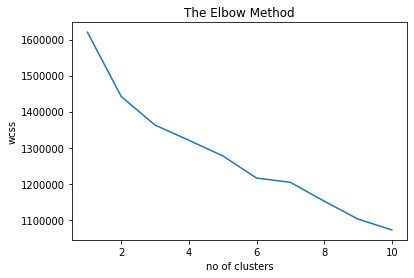

In [157]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [158]:
#We choose k as 4
kmeans = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
kmeans.fit(df_test_std)
clusters = kmeans.predict(df_test_std)

In [159]:
df_test['Cluster'] = clusters
df_test_cluster = df_test.groupby(['Cluster']).mean()
df_test_cluster

/Users/luwenlei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,subid,retarget_TF_False,retarget_TF_True,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,intended_use_access to exclusive content,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,male_TF_False,male_TF_True,payment_type_Apple Pay,payment_type_CBD,payment_type_Najim,payment_type_Paypal,payment_type_RAKBANK,payment_type_Standard Charter,payment_type_unknown,age_Middle-Aged Adult,age_Senior Adult,age_Unknown,age_Young Adult,renew_False,renew_True,num_trial_days,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,revenue_net_1month,revenue_net
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2.498649e+07,1.0,0.0,0.538955,0.193728,0.024678,0.015324,0.035904,0.367366,0.028019,0.072698,0.072208,0.027796,0.302642,0.116041,0.903470,0.096530,0.000000,0.000000,0.000000,0.000000,0.000045,0.000000,0.999955,0.583589,0.263041,0.003742,0.149628,1.000000,0.000000,14.000000,2.983380,27.706816,1.998054,1.642586,0.833558,2.575100,4.980637,0.000143,0.374265,-0.001216,-0.001216
1,2.477097e+07,0.0,1.0,0.553333,0.152593,0.018519,0.021481,0.037037,0.365926,0.021481,0.057778,0.073333,0.048148,0.293333,0.073333,0.951111,0.048889,0.000000,0.026667,0.009630,0.182963,0.071111,0.198519,0.511111,0.477778,0.251111,0.174074,0.097037,0.511111,0.224753,13.917037,2.975630,27.559157,1.998832,1.809721,0.637667,2.555487,4.597011,0.028202,0.500510,1.948172,1.713268
2,2.498538e+07,1.0,0.0,0.357515,0.196293,0.035872,0.030661,0.059419,0.310421,0.042585,0.112124,0.132365,0.043487,0.221543,0.112124,0.819138,0.180862,0.000301,0.075150,0.039479,0.319739,0.178056,0.387275,0.000000,0.566232,0.327054,0.000200,0.106513,0.000200,0.447295,14.000000,3.023266,28.599070,1.998800,1.855440,0.373361,2.329029,4.255541,0.052069,0.573416,4.004875,5.548440
3,2.500195e+07,1.0,0.0,0.782072,0.187156,0.009068,0.003419,0.016501,0.541549,0.000297,0.000595,0.000595,0.006689,0.356177,0.094098,0.955701,0.044299,0.000000,0.023636,0.009811,0.356325,0.135127,0.475100,0.000000,0.000297,0.000000,0.999405,0.000297,0.000000,0.460408,14.000000,2.998339,27.991264,1.999796,2.272665,0.368403,2.423432,4.306691,0.049000,0.593310,4.298799,1.590198


In [160]:
##k-means clustering for train set
#Building the Model
#KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod

from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(df_train_std)
    wcss.append(kmeans.inertia_)

   

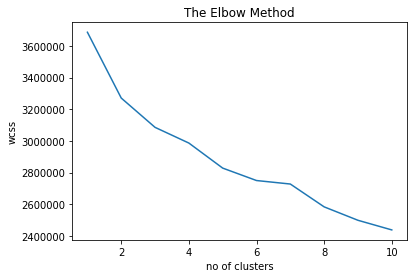

In [161]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [162]:
#We choose k as 4
kmeans = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
kmeans.fit(df_train_std)
clusters = kmeans.predict(df_train_std)

In [163]:
df_train['Cluster'] = clusters
df_train_cluster = df_train.groupby(['Cluster']).mean()
df_train_cluster

/Users/luwenlei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,subid,retarget_TF_False,retarget_TF_True,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,intended_use_access to exclusive content,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,male_TF_False,male_TF_True,payment_type_Apple Pay,payment_type_CBD,payment_type_Najim,payment_type_Paypal,payment_type_RAKBANK,payment_type_Standard Charter,payment_type_unknown,age_Middle-Aged Adult,age_Senior Adult,age_Unknown,age_Young Adult,renew_False,renew_True,num_trial_days,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,revenue_net_1month,revenue_net
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2.499406e+07,0.967958,0.032042,0.547020,0.185005,0.022893,0.015647,0.036637,0.364748,0.027589,0.070177,0.076775,0.030949,0.302425,0.113574,1.000000,0.000000,0.0,0.000000,0.000000,0.000020,0.000020,0.000040,0.999919,0.579933,0.261983,0.004271,0.153813,0.999939,0.000030,14.000000,2.950340,26.931337,2.000335,1.657405,0.839701,2.605236,4.981366,0.000247,0.381966,-0.000829,-0.001010
1,2.499409e+07,0.955557,0.044443,0.519143,0.179794,0.026480,0.017541,0.036431,0.371648,0.035672,0.079356,0.087705,0.024962,0.271968,0.113257,0.999494,0.000506,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.333867,0.162759,0.465340,0.038033,0.000126,0.453266,13.992916,2.971583,27.538861,2.002461,1.899516,0.385148,2.240671,4.224402,0.044121,0.545841,4.033512,3.589664
2,2.496360e+07,0.985960,0.014040,0.467879,0.270000,0.033434,0.019899,0.062828,0.414141,0.019394,0.053636,0.056667,0.016263,0.315152,0.109192,0.000909,0.999091,0.0,0.045455,0.012626,0.150808,0.079495,0.206869,0.504747,0.525152,0.290606,0.071212,0.113030,0.504949,0.226195,13.998586,3.383136,34.782696,2.006377,1.704637,0.590050,2.137776,4.582789,0.015242,0.441771,2.042770,2.442859
3,2.499829e+07,0.962571,0.037429,0.542504,0.179093,0.025524,0.017858,0.039527,0.398784,0.025866,0.067706,0.081110,0.029849,0.277033,0.102736,0.999829,0.000171,0.0,0.078069,0.041711,0.000000,0.242002,0.638174,0.000043,0.325468,0.195409,0.415528,0.063595,0.000086,0.451947,13.992805,2.947410,27.465617,1.996409,2.075834,0.366263,2.493547,4.283700,0.054217,0.606398,4.197249,3.945710


In [164]:
##k-means clustering for all_data set
#Building the Model
#KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod

from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(df_std)
    wcss.append(kmeans.inertia_)


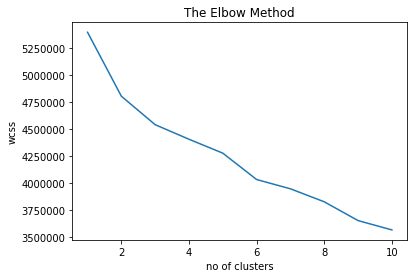

In [165]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [166]:
#We choose k as 4
kmeans = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
kmeans.fit(df_std)
clusters = kmeans.predict(df_std)

In [167]:
df04['Cluster'] = clusters
df_cluster = df04.groupby(['Cluster']).mean()
df_cluster

,subid,retarget_TF_False,retarget_TF_True,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,intended_use_access to exclusive content,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,male_TF_False,male_TF_True,payment_type_Apple Pay,payment_type_CBD,payment_type_Najim,payment_type_Paypal,payment_type_RAKBANK,payment_type_Standard Charter,payment_type_unknown,age_Middle-Aged Adult,age_Senior Adult,age_Unknown,age_Young Adult,renew_False,renew_True,num_trial_days,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,revenue_net_1month,revenue_net
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2.499411e+07,1.000000,0.000000,0.537381,0.179747,0.025265,0.018076,0.038920,0.392670,0.028157,0.071271,0.083397,0.027992,0.276055,0.106782,0.999959,0.000041,0.000041,0.051067,0.027930,0.336232,0.161423,0.423307,0.000000,0.323135,0.183692,0.436404,0.056769,0.000041,0.452016,14.000000,2.954367,27.501213,1.998009,2.025229,0.372523,2.410831,4.271478,0.051215,0.586259,4.139663,3.829927
1,2.495836e+07,1.000000,0.000000,0.461780,0.273278,0.034338,0.021515,0.062122,0.416328,0.018879,0.054499,0.055710,0.017383,0.310608,0.109995,0.000784,0.999216,0.000071,0.044953,0.012040,0.150317,0.078364,0.208805,0.505450,0.521550,0.291729,0.071383,0.115338,0.505735,0.225677,14.000000,3.383689,34.774000,2.006719,1.713162,0.591648,2.150962,4.597966,0.016351,0.441558,2.045058,2.441163
2,2.496191e+07,0.000224,0.999776,0.534198,0.177917,0.024586,0.017881,0.039338,0.370139,0.023916,0.054984,0.069736,0.048726,0.285874,0.086947,0.953286,0.046714,0.000000,0.025704,0.011399,0.178811,0.068395,0.191551,0.524139,0.481001,0.251006,0.171211,0.096781,0.524251,0.219844,13.915512,2.993311,27.497339,2.005391,1.841165,0.632910,2.507138,4.575380,0.026899,0.498216,1.896366,1.700616
3,2.499311e+07,1.000000,0.000000,0.547290,0.184535,0.022834,0.015271,0.035462,0.364356,0.028370,0.071834,0.076387,0.029867,0.301758,0.114360,1.000000,0.000000,0.000000,0.000000,0.000000,0.000015,0.000029,0.000029,0.999927,0.582855,0.260070,0.004229,0.152847,0.999956,0.000022,14.000000,2.947764,26.920076,1.999182,1.652814,0.837788,2.604413,4.981821,0.000203,0.379759,-0.001002,-0.001133


In [168]:
##Check how many users each cluster have
df04['Cluster'].value_counts(dropna=False)

3    68101
0    48407
1    14037
2     4474
Name: Cluster, dtype: int64

In [169]:
##Save the cluster results into 'csv' format
df_cluster.to_csv('df_cluster.csv', encoding='utf_8_sig', index=True)

# 4. Churn model


In [170]:
##Let us fill in the missing value
# if for one typical customer, there exists 'next_payment' time, then we assume the 'churn' value should be 'False'
def fill_renew03(payment_period, next_payment):
    if payment_period == 0:
        if str( next_payment ) == 'NaT':
            return(True)
        else:
            return(False)
    if payment_period == 1:
        if str( next_payment ) == 'NaT':
            return(True)
        else:
            return(False)        
    if payment_period == 2:
        if str( next_payment ) == 'NaT':
            return(True)
        else:
            return(False)        
    if payment_period == 3:
        if str( next_payment ) == 'NaT':
            return(True)
        else:
            return(False)        
        
    if payment_period == 4:
        if str( next_payment ) == 'NaT':
            return(True)
        else:
            return(False)        
        
    if payment_period == 5:
        if str( next_payment ) == 'NaT':
            return(True)
        else:
            return(False)
     
    if payment_period == 6:
        if str( next_payment ) == 'NaT':
            return(True)
        else:
            return(False)        
            
     
    if payment_period == 7:
        if str( next_payment ) == 'NaT':
            return(True)
        else:
            return(False)             
            
cs['churn'] = cs.apply(lambda row: fill_renew03( row['payment_period'], row['next_payment'] ), axis = 1)

In [171]:
cs['churn'].value_counts(dropna=False)

True     1367290
False     837653
NaN         3700
Name: churn, dtype: int64

In [172]:
cs = cs.drop(['renew'], axis = 1)
cs = cs.drop(['subid01'], axis = 1)

In [173]:
cs.head(50)

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,churn
4,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,0,2019-11-26 03:30:29,2019-11-26 03:30:29,False
5,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,1,2019-11-26 03:30:29,2019-12-27 03:30:29,False
6,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,2,2019-12-27 03:30:29,2020-01-26 03:30:29,False
7,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,3,2020-01-26 03:30:29,NaT,True
8,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,0,2020-03-19 01:20:25,2020-04-02 01:20:25,False
9,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,1,2020-04-02 01:20:25,NaT,True
10,32408758,28778936,True,NaT,2020-03-27 23:46:37,0,True,google,1.1377,0,2020-03-27 23:46:37,2020-03-28 06:47:31,False
11,32408758,28778936,True,NaT,2020-03-27 23:46:37,0,True,google,1.1377,1,2020-03-28 06:47:31,NaT,True
12,39370969,21481314,True,NaT,2020-03-27 23:09:18,0,True,google,1.1377,0,2020-03-27 23:09:18,2020-03-28 05:09:22,False
13,39370969,21481314,True,NaT,2020-03-27 23:09:18,0,True,google,1.1377,1,2020-03-28 05:09:22,NaT,True


In [174]:
cs['subid04'] = cs['subid']
cs= cs.drop(['subid'],axis = 1)

In [175]:

##Here, we start to merge the 3 datasets:cs, engagement and subsribers
pd03 = pd.merge(cs,subscribers, left_on='subid04', right_on= 'subid02', how = 'inner')
pd04 = pd.merge(pd03,engagement, left_on='subid04', right_on= 'subid03', how = 'inner')
df02 = pd04

In [176]:
df02 = df02.drop(['subid02'],axis = 1)
df02 = df02.drop(['subid03'],axis = 1)

In [177]:
df02['churn'].value_counts(dropna=False)

False    3090750
True     2585724
Name: churn, dtype: int64

In [178]:
len(df02['churn'])

5676474

In [179]:
df02['date'].describe()

count                 5676474
unique                    301
top       2019-11-30 00:00:00
freq                    27179
first     2019-06-30 00:00:00
last      2020-04-25 00:00:00
Name: date, dtype: object

In [180]:
#extract the 'month' from 'date' column

df02['date'] = df02['date'].astype('datetime64')
df02['month'] = pd.DatetimeIndex(df02['date']).month


In [181]:
df02['month'].value_counts(dropna=False)

12    710500
9     697811
10    681024
8     668234
11    607479
3     606546
7     560680
1     535449
2     369202
4     235716
6       3833
Name: month, dtype: int64

In [182]:
#separate df02 into month, i will calculate churn month by month

In [183]:
df02_June = df02.loc[df02['month'] == 6]
df02_July = df02.loc[df02['month'] == 7]
df02_August = df02.loc[df02['month'] == 8]
df02_September= df02.loc[df02['month'] == 9]
df02_October = df02.loc[df02['month'] == 10]
df02_November = df02.loc[df02['month'] == 11]
df02_December = df02.loc[df02['month'] == 12]
df02_January = df02.loc[df02['month'] == 1]
df02_February= df02.loc[df02['month'] == 2]
df02_March = df02.loc[df02['month'] == 3]
df02_April= df02.loc[df02['month'] == 4]

In [184]:
len(df02_June['subid04'])

3833

In [185]:
df02_June['CAC'] = 59670/len(df02_June['subid04'])

/Users/luwenlei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [186]:
df02_June

,customer_service_rep_id,current_sub_TF,cancel_date,account_creation_date_x,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period_x,last_payment,next_payment,churn,subid04,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date_y,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period_y,month,CAC
5531157,38831218,False,2019-07-11 13:05:47,2019-06-30 23:59:50,14,False,OTT,0.0000,0,2019-06-30 23:59:50,NaT,True,29558438,NaN,3.097781,NaN,expand regional access,27.301448,1.932437,False,Middle-Aged Adult,False,UAE,email,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-06-30 23:59:50,11.0,False,2019-07-15,False,0.0000,0.0000,ar,False,False,unknown,2019-06-30,1.0,0.0,7.0,7.0,0.0,0.0,0.0,6,15.567441
5531169,38010004,False,NaT,2019-06-30 23:59:10,14,True,OTT,4.5875,0,2019-07-01 06:59:20,2019-07-15 14:33:39,False,22183626,NaN,2.549893,NaN,expand regional access,20.051667,1.951227,False,Senior Adult,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-06-30 23:59:10,NaN,True,2019-07-15,False,4.5875,0.0367,ar,True,False,Standard Charter,2019-06-30,1.0,0.0,2.0,7.0,0.0,0.0,0.0,6,15.567441
5531203,38010004,False,NaT,2019-06-30 23:59:10,14,True,OTT,4.5875,1,2019-07-15 14:33:39,NaT,True,22183626,NaN,2.549893,NaN,expand regional access,20.051667,1.951227,False,Senior Adult,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-06-30 23:59:10,NaN,True,2019-07-15,False,4.5875,0.0367,ar,True,False,Standard Charter,2019-06-30,1.0,0.0,2.0,7.0,0.0,0.0,0.0,6,15.567441
5531237,33998293,True,NaT,2019-06-30 23:57:07,14,True,OTT,4.5875,0,2019-07-01 06:44:55,2019-07-15 14:34:56,False,23348055,NaN,2.998568,NaN,expand international access,24.401536,1.999848,False,Senior Adult,False,UAE,facebook,affiliate,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-06-30 23:57:07,NaN,True,2019-07-15,False,13.7992,0.0367,ar,True,False,Najim,2019-06-30,1.0,0.0,2.0,7.0,0.0,0.0,0.0,6,15.567441
5531243,33998293,True,NaT,2019-06-30 23:57:07,14,True,OTT,4.5875,1,2019-07-15 14:34:56,2019-11-12 13:40:29,False,23348055,NaN,2.998568,NaN,expand international access,24.401536,1.999848,False,Senior Adult,False,UAE,facebook,affiliate,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-06-30 23:57:07,NaN,True,2019-07-15,False,13.7992,0.0367,ar,True,False,Najim,2019-06-30,1.0,0.0,2.0,7.0,0.0,0.0,0.0,6,15.567441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676360,34410719,False,2019-07-07 14:15:50,2019-06-30 00:01:31,14,False,OTT,0.0000,0,2019-06-30 01:05:36,NaT,True,29969407,NaN,4.820977,NaN,expand international access,28.751405,2.694708,False,Middle-Aged Adult,False,UAE,search,tv,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-06-30 00:01:31,7.0,False,2019-07-15,False,0.0000,0.0367,ar,False,False,unknown,2019-06-30,1.0,4.0,6.0,6.0,0.0,1.0,0.0,6,15.567441
5676368,38865556,False,NaT,2019-06-30 00:01:25,14,True,OTT,4.9178,0,2019-06-30 00:01:25,2019-07-14 14:33:09,False,27585257,NaN,2.591132,NaN,other,27.301448,1.936826,False,Middle-Aged Adult,False,UAE,google_organic,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2019-06-30 00:01:25,NaN,True,2019-07-15,False,4.9178,0.0000,ar,True,False,Najim,2019-06-30,1.0,1.0,6.0,6.0,0.0,1.0,0.0,6,15.567441
5676414,38865556,False,NaT,2019-06-30 00:01:25,14,True,OTT,4.9178,1,2019-07-14 14:33:09,NaT,True,27585257,NaN,2.591132,NaN,other,27.301448,1

# 4.1 Building Churn Model and calculated CLV for June.


In [187]:
#All the feature i use would be :
#categorical:['preferred_genre','intended_use', 'retarget_TF','age']
#numerical: ['num_weekly_services_utilized', 'weekly_consumption_hour', 'num_ideal_streaming_services',
#'app_opens', 'cust_service_mssgs', 'num_videos_completed', 'num_videos_more_than_30_seconds', 'num_videos_rated', 'num_series_started', 'revenue_net_1month', 'revenue_net']

In [188]:
df02_June = df02_June[['preferred_genre','intended_use', 'retarget_TF','num_weekly_services_utilized', 'weekly_consumption_hour',
            'app_opens', 'cust_service_mssgs', 'num_videos_rated', 'churn','subid04', 'CAC','monthly_price']]

categoriacal_features = ['preferred_genre','intended_use', 'retarget_TF']
numerical_features = ['num_weekly_services_utilized', 'weekly_consumption_hour', 
            'app_opens', 'cust_service_mssgs', 'num_videos_rated']


In [189]:
##get dummy
df02_June['retarget_TF'] = df02_June['retarget_TF'].astype('object')

/Users/luwenlei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [190]:
##get dummy


df02_June02 = df02_June.drop(categoriacal_features,axis=1)

for feature in categoriacal_features:
    dummy = pd.get_dummies(df02_June [categoriacal_features])
df02_June02 = pd.concat( [df02_June02, dummy], axis = 1 )


In [191]:
#transfer the 'churn'column type
df02_June03 = df02_June02
df02_June03["churn"] = df02_June03 ["churn"].astype(int)
df02_June03

,num_weekly_services_utilized,weekly_consumption_hour,app_opens,cust_service_mssgs,num_videos_rated,churn,subid04,CAC,monthly_price,preferred_genre_comedy,preferred_genre_drama,preferred_genre_regional,intended_use_access to exclusive content,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,retarget_TF_False,retarget_TF_True
5531157,3.097781,27.301448,1.0,0.0,0.0,1,29558438,15.567441,4.7343,0,0,0,0,0,0,1,0,0,0,1,0
5531169,2.549893,20.051667,1.0,0.0,0.0,0,22183626,15.567441,4.7343,0,0,0,0,0,0,1,0,0,0,1,0
5531203,2.549893,20.051667,1.0,0.0,0.0,1,22183626,15.567441,4.7343,0,0,0,0,0,0,1,0,0,0,1,0
5531237,2.998568,24.401536,1.0,0.0,0.0,0,23348055,15.567441,4.7343,0,0,0,0,0,1,0,0,0,0,1,0
5531243,2.998568,24.401536,1.0,0.0,0.0,0,23348055,15.567441,4.7343,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676360,4.820977,28.751405,1.0,4.0,0.0,1,29969407,15.567441,4.7343,0,0,0,0,0,1,0,0,0,0,1,0
5676368,2.591132,27.301448,1.0,1.0,0.0,0,27585257,15.567441,4.7343,0,0,0,0,0,0,0,1,0,0,1,0
5676414,2.591132,27.301448,1.0,1.0,0.0,1,27585257,15.567441,4.7343,0,0,0,0,0,0,0,1,0,0,1,0
5676460,4.193557,30.201361,1.0,1.0,0.0,1,26986758,15.567441,4.7343,0,0,0,0,0,1,0,0,0,0,1,0


In [192]:
df = df02_June03.reset_index(drop = True)

In [193]:
df

,num_weekly_services_utilized,weekly_consumption_hour,app_opens,cust_service_mssgs,num_videos_rated,churn,subid04,CAC,monthly_price,preferred_genre_comedy,preferred_genre_drama,preferred_genre_regional,intended_use_access to exclusive content,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,retarget_TF_False,retarget_TF_True
0,3.097781,27.301448,1.0,0.0,0.0,1,29558438,15.567441,4.7343,0,0,0,0,0,0,1,0,0,0,1,0
1,2.549893,20.051667,1.0,0.0,0.0,0,22183626,15.567441,4.7343,0,0,0,0,0,0,1,0,0,0,1,0
2,2.549893,20.051667,1.0,0.0,0.0,1,22183626,15.567441,4.7343,0,0,0,0,0,0,1,0,0,0,1,0
3,2.998568,24.401536,1.0,0.0,0.0,0,23348055,15.567441,4.7343,0,0,0,0,0,1,0,0,0,0,1,0
4,2.998568,24.401536,1.0,0.0,0.0,0,23348055,15.567441,4.7343,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3828,4.820977,28.751405,1.0,4.0,0.0,1,29969407,15.567441,4.7343,0,0,0,0,0,1,0,0,0,0,1,0
3829,2.591132,27.301448,1.0,1.0,0.0,0,27585257,15.567441,4.7343,0,0,0,0,0,0,0,1,0,0,1,0
3830,2.591132,27.301448,1.0,1.0,0.0,1,27585257,15.567441,4.7343,0,0,0,0,0,0,0,1,0,0,1,0
3831,4.193557,30.201361,1.0,1.0,0.0,1,26986758,15.567441,4.7343,0,0,0,0,0,1,0,0,0,0,1,0


In [194]:
#train test split
X = df.drop('churn', axis = 1)
y= df['churn']
X_noid = X.drop(['subid04','CAC','monthly_price'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X_noid, y, test_size = .3,stratify = y, random_state = 30)
#Standardization
sc = StandardScaler() 
X_train_= sc.fit_transform(X_train) 
X_test= sc.transform(X_test) 
# Instantiate the classifier 
clf = RandomForestClassifier(n_estimators=200) 
# Fit to the training data 
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [195]:
# Predict the labels for the test set 
y_pred = clf.predict(X_test) 
accuracy_score(y_test, y_pred) 
# predict probabilities
probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate scores
auc = roc_auc_score(y_test, probs)
# summarize scores
print('LROC AUC=%.3f' % (auc))

LROC AUC=0.513


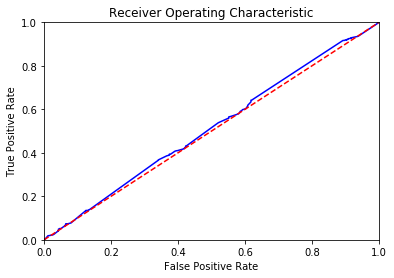

In [196]:
# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(y_test, probs)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [197]:
#assign the probability of churn to each user
index_y = y_test.index
churnRate = pd.DataFrame(probs, index=index_y)
E= pd.merge(y_test, churnRate, left_index=True, right_index=True)
June_churnRate = pd.merge(X, E,  left_index=True, right_index=True, how='inner')
June_churnRate['churnRate'] = June_churnRate[0]
June_churnRate = June_churnRate.drop([0],axis = 1).reset_index()

In [198]:
#assign predicted churn to each user with threshold of 0.5
threshold = 0.5
predicted = (probs >= threshold).astype('int')
accuracy = accuracy_score(y_test, predicted)
index_y = y_test.index
B = pd.DataFrame(predicted, index=index_y)

C= pd.merge(y_test, B, left_index=True, right_index=True)
June_predictedChurn = pd.merge(X, C,  left_index=True, right_index=True, how='inner')
June_predictedChurn['predicted churn'] = June_predictedChurn[0]
June_predictedChurn = June_predictedChurn.drop([0],axis = 1)

In [199]:
monthly_price = June_churnRate.groupby('subid04')['monthly_price'].sum().reset_index()
monthly_price['monthly_price02'] = monthly_price['monthly_price']
monthly_price = monthly_price.drop(['monthly_price'],axis = 1)
June_churnRate02 = pd.merge(June_churnRate,monthly_price,left_on='subid04', right_on= 'subid04', how = 'inner')
June_churnRate02 = June_churnRate02.drop(['monthly_price'], axis = 1)
June_churnRate02['monthly_price'] = June_churnRate02['monthly_price02']
June_churnRate02 = June_churnRate02.drop(['monthly_price02'], axis = 1)
June = June_churnRate02.groupby('subid04')['monthly_price','churnRate','CAC'].mean().reset_index()

In [200]:
June['clv'] = June['monthly_price']*1.1/(0.1+June['churnRate'])-June['CAC']
June['clv'].sum()/len(June['clv'])

-4.140644099314708

# 4.2 Building Churn Model and calculated CLV for July.

In [201]:
df02_July['CAC'] = 48906/len(df02_July['subid04'])

/Users/luwenlei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [202]:
df02_July = df02_July[['preferred_genre','intended_use', 'retarget_TF','num_weekly_services_utilized', 'weekly_consumption_hour',
            'app_opens', 'cust_service_mssgs', 'num_videos_rated', 'churn','subid04', 'CAC','monthly_price']]

categoriacal_features = ['preferred_genre','intended_use', 'retarget_TF']
numerical_features = ['num_weekly_services_utilized', 'weekly_consumption_hour', 
            'app_opens', 'cust_service_mssgs', 'num_videos_rated']


In [203]:
##get dummy
df02_July['retarget_TF'] = df02_July['retarget_TF'].astype('object')

In [204]:
##get dummy


df02_July02 = df02_July.drop(categoriacal_features,axis=1)

for feature in categoriacal_features:
    dummy = pd.get_dummies(df02_July [categoriacal_features])
df02_July02 = pd.concat( [df02_July02, dummy], axis = 1 )


In [205]:
#transfer the 'churn'column type
df02_July03 = df02_July02
df02_July03["churn"] = df02_July03 ["churn"].astype(int)
df02_July03

,num_weekly_services_utilized,weekly_consumption_hour,app_opens,cust_service_mssgs,num_videos_rated,churn,subid04,CAC,monthly_price,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,intended_use_access to exclusive content,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,retarget_TF_False,retarget_TF_True
4286495,2.228817,25.851492,1.0,3.0,0.0,1,21242084,0.087226,4.7343,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4286506,4.860744,36.001186,6.0,1.0,0.0,1,28723754,0.087226,4.7343,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4286514,3.253900,62.100399,1.0,0.0,0.0,0,27198693,0.087226,4.7343,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4286533,3.253900,62.100399,1.0,0.0,0.0,1,27198693,0.087226,4.7343,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4286552,2.773759,25.851492,1.0,1.0,0.0,1,28538185,0.087226,4.7343,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676468,4.193557,30.201361,0.0,0.0,0.0,1,26986758,0.087226,4.7343,0,0,0,0,0,0,0,1,0,0,0,0,1,0
5676469,4.193557,30.201361,1.0,0.0,0.0,1,26986758,0.087226,4.7343,0,0,0,0,0,0,0,1,0,0,0,0,1,0
5676470,4.193557,30.201361,1.0,0.0,0.0,1,26986758,0.087226,4.7343,0,0,0,0,0,0,0,1,0,0,0,0,1,0
5676471,4.193557,30.201361,1.0,0.0,0.0,1,26986758,0.087226,4.7343,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [208]:
df = df02_July03.reset_index(drop = True)

In [209]:
#train test split
X = df.drop('churn', axis = 1)
y= df['churn']
X_noid = X.drop(['subid04','CAC','monthly_price'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X_noid, y, test_size = .3,stratify = y, random_state = 30)
#Standardization
sc = StandardScaler() 
X_train_= sc.fit_transform(X_train) 
X_test= sc.transform(X_test) 
# Instantiate the classifier 
clf = RandomForestClassifier(n_estimators=200) 
# Fit to the training data 
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [210]:
# Predict the labels for the test set 
y_pred = clf.predict(X_test) 
accuracy_score(y_test, y_pred) 
# predict probabilities
probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate scores
auc = roc_auc_score(y_test, probs)
# summarize scores
print('LROC AUC=%.3f' % (auc))

LROC AUC=0.519


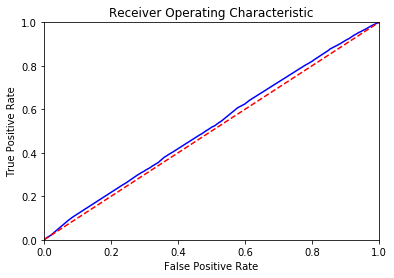

In [211]:
# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(y_test, probs)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [212]:
#assign the probability of churn to each user
index_y = y_test.index
churnRate = pd.DataFrame(probs, index=index_y)
E= pd.merge(y_test, churnRate, left_index=True, right_index=True)
July_churnRate = pd.merge(X, E,  left_index=True, right_index=True, how='inner')
July_churnRate['churnRate'] = July_churnRate[0]
July_churnRate = July_churnRate.drop([0],axis = 1).reset_index()

In [213]:
#assign predicted churn to each user with threshold of 0.5
threshold = 0.5
predicted = (probs >= threshold).astype('int')
accuracy = accuracy_score(y_test, predicted)
index_y = y_test.index
B = pd.DataFrame(predicted, index=index_y)

C= pd.merge(y_test, B, left_index=True, right_index=True)
July_predictedChurn = pd.merge(X, C,  left_index=True, right_index=True, how='inner')
July_predictedChurn['predicted churn'] = July_predictedChurn[0]
July_predictedChurn = July_predictedChurn.drop([0],axis = 1)

In [214]:
monthly_price = July_churnRate.groupby('subid04')['monthly_price'].sum().reset_index()
monthly_price['monthly_price02'] = monthly_price['monthly_price']
monthly_price = monthly_price.drop(['monthly_price'],axis = 1)
July_churnRate02 = pd.merge(July_churnRate,monthly_price,left_on='subid04', right_on= 'subid04', how = 'inner')
July_churnRate02 = July_churnRate02.drop(['monthly_price'], axis = 1)
July_churnRate02['monthly_price'] = July_churnRate02['monthly_price02']
July_churnRate02 = July_churnRate02.drop(['monthly_price02'], axis = 1)
July = July_churnRate02.groupby('subid04')['monthly_price','churnRate','CAC'].mean().reset_index()

In [215]:
July['clv'] = July['monthly_price']*1.1/(0.1+July['churnRate'])-July['CAC']
July['clv'].sum()/len(July['clv'])

61.04278734489134

# 4.3 Building Churn Model and calculated CLV for August

In [216]:
df02_August['CAC'] = 53236/len(df02_August['subid04'])

/Users/luwenlei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [217]:
df02_August = df02_August[['preferred_genre','intended_use', 'retarget_TF','num_weekly_services_utilized', 'weekly_consumption_hour',
            'app_opens', 'cust_service_mssgs', 'num_videos_rated', 'churn','subid04', 'CAC','monthly_price']]

categoriacal_features = ['preferred_genre','intended_use', 'retarget_TF']
numerical_features = ['num_weekly_services_utilized', 'weekly_consumption_hour', 
            'app_opens', 'cust_service_mssgs', 'num_videos_rated']


In [218]:
##get dummy
df02_August['retarget_TF'] = df02_August['retarget_TF'].astype('object')

In [219]:
##get dummy


df02_August02 = df02_August.drop(categoriacal_features,axis=1)

for feature in categoriacal_features:
    dummy = pd.get_dummies(df02_August [categoriacal_features])
df02_August02 = pd.concat( [df02_August02, dummy], axis = 1 )


In [220]:
#transfer the 'churn'column type
df02_August03 = df02_August02
df02_August03["churn"] = df02_August03 ["churn"].astype(int)
df02_August03

,num_weekly_services_utilized,weekly_consumption_hour,app_opens,cust_service_mssgs,num_videos_rated,churn,subid04,CAC,monthly_price,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,intended_use_access to exclusive content,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,retarget_TF_False,retarget_TF_True
3685511,2.998568,33.101274,1.0,0.0,0.0,1,29452692,0.079667,4.7343,0,1,0,0,0,0,0,0,0,0,1,0,1,0
3685513,2.998568,27.997724,1.0,0.0,0.0,0,23982437,0.079667,4.7343,0,1,0,0,0,0,0,0,0,0,1,0,1,0
3685589,2.998568,27.997724,1.0,0.0,0.0,0,23982437,0.079667,4.7343,0,1,0,0,0,0,0,0,0,0,1,0,1,0
3685665,2.998568,27.997724,1.0,0.0,0.0,1,23982437,0.079667,4.7343,0,1,0,0,0,0,0,0,0,0,1,0,1,0
3685741,2.998568,27.301448,2.0,0.0,0.0,0,22397678,0.079667,4.7343,0,1,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676455,2.591132,27.301448,1.0,1.0,0.0,1,27585257,0.079667,4.7343,0,0,0,0,0,0,0,0,0,1,0,0,1,0
5676456,2.591132,27.301448,1.0,1.0,0.0,1,27585257,0.079667,4.7343,0,0,0,0,0,0,0,0,0,1,0,0,1,0
5676457,2.591132,27.301448,1.0,0.0,0.0,1,27585257,0.079667,4.7343,0,0,0,0,0,0,0,0,0,1,0,0,1,0
5676458,2.591132,27.301448,1.0,1.0,0.0,1,27585257,0.079667,4.7343,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [221]:
df = df02_August03.reset_index(drop = True)

In [222]:
#train test split
X = df.drop('churn', axis = 1)
y= df['churn']
X_noid = X.drop(['subid04','CAC','monthly_price'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X_noid, y, test_size = .3,stratify = y, random_state = 30)
#Standardization
sc = StandardScaler() 
X_train_= sc.fit_transform(X_train) 
X_test= sc.transform(X_test) 
# Instantiate the classifier 
clf = RandomForestClassifier(n_estimators=200) 
# Fit to the training data 
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [223]:
# Predict the labels for the test set 
y_pred = clf.predict(X_test) 
accuracy_score(y_test, y_pred) 
# predict probabilities
probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate scores
auc = roc_auc_score(y_test, probs)
# summarize scores
print('LROC AUC=%.3f' % (auc))

LROC AUC=0.542


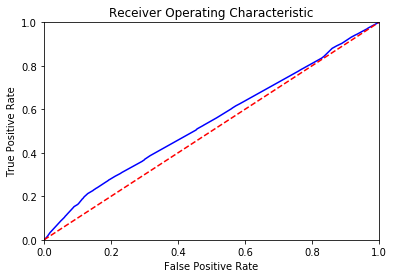

In [224]:
# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(y_test, probs)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [225]:
#assign the probability of churn to each user
index_y = y_test.index
churnRate = pd.DataFrame(probs, index=index_y)
E= pd.merge(y_test, churnRate, left_index=True, right_index=True)
August_churnRate = pd.merge(X, E,  left_index=True, right_index=True, how='inner')
August_churnRate['churnRate'] =August_churnRate[0]
August_churnRate = August_churnRate.drop([0],axis = 1).reset_index()

In [226]:
#assign predicted churn to each user with threshold of 0.5
threshold = 0.5
predicted = (probs >= threshold).astype('int')
accuracy = accuracy_score(y_test, predicted)
index_y = y_test.index
B = pd.DataFrame(predicted, index=index_y)

C= pd.merge(y_test, B, left_index=True, right_index=True)
August_predictedChurn = pd.merge(X, C,  left_index=True, right_index=True, how='inner')
August_predictedChurn['predicted churn'] = August_predictedChurn[0]
August_predictedChurn = August_predictedChurn.drop([0],axis = 1)

In [227]:
monthly_price = August_churnRate.groupby('subid04')['monthly_price'].sum().reset_index()
monthly_price['monthly_price02'] = monthly_price['monthly_price']
monthly_price = monthly_price.drop(['monthly_price'],axis = 1)
August_churnRate02 = pd.merge(August_churnRate,monthly_price,left_on='subid04', right_on= 'subid04', how = 'inner')
August_churnRate02 = August_churnRate02.drop(['monthly_price'], axis = 1)
August_churnRate02['monthly_price'] = August_churnRate02['monthly_price02']
August_churnRate02 = August_churnRate02.drop(['monthly_price02'], axis = 1)
August = August_churnRate02.groupby('subid04')['monthly_price','churnRate','CAC'].mean().reset_index()

In [228]:
August['clv'] = August['monthly_price']*1.1/(0.1+August['churnRate'])-August['CAC']
August['clv'].sum()/len(August['clv'])

88.01813730669741

# 4.4 Building Churn Model and calculated CLV for September

In [229]:
df02_September['CAC'] = 54931/len(df02_September['subid04'])

/Users/luwenlei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [230]:
df02_September= df02_September[['preferred_genre','intended_use', 'retarget_TF','num_weekly_services_utilized', 'weekly_consumption_hour',
            'app_opens', 'cust_service_mssgs', 'num_videos_rated', 'churn','subid04', 'CAC','monthly_price']]

categoriacal_features = ['preferred_genre','intended_use', 'retarget_TF']
numerical_features = ['num_weekly_services_utilized', 'weekly_consumption_hour', 
            'app_opens', 'cust_service_mssgs', 'num_videos_rated']


In [231]:
##get dummy
df02_September['retarget_TF'] = df02_September['retarget_TF'].astype('object')

In [232]:
##get dummy


df02_September02 = df02_September.drop(categoriacal_features,axis=1)

for feature in categoriacal_features:
    dummy = pd.get_dummies(df02_September [categoriacal_features])
df02_September02 = pd.concat( [df02_September02, dummy], axis = 1 )


In [233]:
#transfer the 'churn'column type
df02_September03 = df02_September02
df02_September03["churn"] = df02_September03 ["churn"].astype(int)
df02_September03

,num_weekly_services_utilized,weekly_consumption_hour,app_opens,cust_service_mssgs,num_videos_rated,churn,subid04,CAC,monthly_price,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,intended_use_access to exclusive content,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,retarget_TF_False,retarget_TF_True
3082084,2.998568,25.851492,1.0,0.0,0.0,1,22319908,0.078719,4.7343,1,0,0,0,0,1,0,0,0,0,0,0,1,0
3082089,2.906315,30.201361,1.0,0.0,0.0,1,25843682,0.078719,4.7343,1,0,0,0,0,1,0,0,0,0,0,0,1,0
3082103,2.573458,25.851492,1.0,0.0,0.0,1,29142134,0.078719,4.7343,1,0,0,0,0,0,0,0,0,0,1,0,1,0
3082109,2.998568,25.851492,4.0,0.0,0.0,1,27347175,0.078719,4.7343,0,1,0,0,0,0,0,0,0,0,0,1,1,0
3082112,2.998568,22.951579,1.0,0.0,0.0,1,22902464,0.078719,4.7343,0,0,1,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676355,2.290677,27.997724,0.0,0.0,0.0,1,26531005,0.078719,4.7343,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5676356,2.290677,27.997724,0.0,0.0,0.0,1,26531005,0.078719,4.7343,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5676357,2.290677,27.997724,0.0,0.0,0.0,1,26531005,0.078719,4.7343,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5676358,2.290677,27.997724,0.0,0.0,0.0,1,26531005,0.078719,4.7343,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [234]:
df = df02_September03.reset_index(drop = True)

In [235]:
#train test split
X = df.drop('churn', axis = 1)
y= df['churn']
X_noid = X.drop(['subid04','CAC','monthly_price'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X_noid, y, test_size = .3,stratify = y, random_state = 30)
#Standardization
sc = StandardScaler() 
X_train_= sc.fit_transform(X_train) 
X_test= sc.transform(X_test) 
# Instantiate the classifier 
clf = RandomForestClassifier(n_estimators=200) 
# Fit to the training data 
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [236]:
# Predict the labels for the test set 
y_pred = clf.predict(X_test) 
accuracy_score(y_test, y_pred) 
# predict probabilities
probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate scores
auc = roc_auc_score(y_test, probs)
# summarize scores
print('LROC AUC=%.3f' % (auc))

LROC AUC=0.589


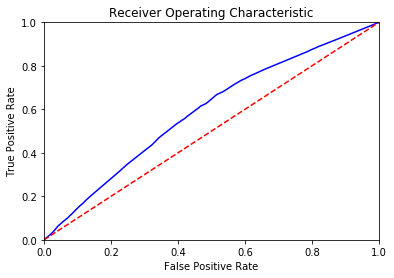

In [237]:
# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(y_test, probs)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [238]:
#assign the probability of churn to each user
index_y = y_test.index
churnRate = pd.DataFrame(probs, index=index_y)
E= pd.merge(y_test, churnRate, left_index=True, right_index=True)
September_churnRate = pd.merge(X, E,  left_index=True, right_index=True, how='inner')
September_churnRate['churnRate'] =September_churnRate[0]
September_churnRate = September_churnRate.drop([0],axis = 1).reset_index()

In [239]:
#assign predicted churn to each user with threshold of 0.5
threshold = 0.5
predicted = (probs >= threshold).astype('int')
accuracy = accuracy_score(y_test, predicted)
index_y = y_test.index
B = pd.DataFrame(predicted, index=index_y)

C= pd.merge(y_test, B, left_index=True, right_index=True)
September_predictedChurn = pd.merge(X, C,  left_index=True, right_index=True, how='inner')
September_predictedChurn['predicted churn'] = September_predictedChurn[0]
September_predictedChurn = September_predictedChurn.drop([0],axis = 1)

In [240]:
monthly_price = September_churnRate.groupby('subid04')['monthly_price'].sum().reset_index()
monthly_price['monthly_price02'] = monthly_price['monthly_price']
monthly_price = monthly_price.drop(['monthly_price'],axis = 1)
September_churnRate02 = pd.merge(September_churnRate,monthly_price,left_on='subid04', right_on= 'subid04', how = 'inner')
September_churnRate02 = September_churnRate02.drop(['monthly_price'], axis = 1)
September_churnRate02['monthly_price'] = September_churnRate02['monthly_price02']
September_churnRate02 = September_churnRate02.drop(['monthly_price02'], axis = 1)
September = September_churnRate02.groupby('subid04')['monthly_price','churnRate','CAC'].mean().reset_index()

In [241]:
September['clv'] = September['monthly_price']*1.1/(0.1+September['churnRate'])-September['CAC']
September['clv'].sum()/len(September['clv'])


93.95571547181282

# 4.5 Building Churn Model and calculated CLV for October

In [242]:
df02_October['CAC'] = 46437/len(df02_October['subid04'])

/Users/luwenlei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [243]:
df02_October= df02_October[['preferred_genre','intended_use', 'retarget_TF','num_weekly_services_utilized', 'weekly_consumption_hour',
            'app_opens', 'cust_service_mssgs', 'num_videos_rated', 'churn','subid04', 'CAC','monthly_price']]

categoriacal_features = ['preferred_genre','intended_use', 'retarget_TF']
numerical_features = ['num_weekly_services_utilized', 'weekly_consumption_hour', 
            'app_opens', 'cust_service_mssgs', 'num_videos_rated']


In [244]:
##get dummy
df02_October['retarget_TF'] = df02_October['retarget_TF'].astype('object')

In [245]:
##get dummy


df02_October02 = df02_October.drop(categoriacal_features,axis=1)

for feature in categoriacal_features:
    dummy = pd.get_dummies(df02_October [categoriacal_features])
df02_October02 = pd.concat( [df02_October02, dummy], axis = 1 )


In [246]:
#transfer the 'churn'column type
df02_October03 = df02_October02
df02_October03["churn"] = df02_October03 ["churn"].astype(int)
df02_October03

,num_weekly_services_utilized,weekly_consumption_hour,app_opens,cust_service_mssgs,num_videos_rated,churn,subid04,CAC,monthly_price,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,intended_use_access to exclusive content,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,retarget_TF_False,retarget_TF_True
2590607,2.998568,27.997724,2.0,0.0,0.0,0,27650113,0.068187,4.7343,1,0,0,0,0,0,0,0,0,0,1,0,1,0
2590653,2.998568,27.997724,2.0,0.0,0.0,1,27650113,0.068187,4.7343,1,0,0,0,0,0,0,0,0,0,1,0,1,0
2590699,2.567567,30.201361,1.0,0.0,0.0,0,21616310,0.068187,4.7343,1,0,0,0,0,1,0,0,0,0,0,0,1,0
2590745,2.567567,30.201361,1.0,0.0,0.0,1,21616310,0.068187,4.7343,1,0,0,0,0,1,0,0,0,0,0,0,1,0
2590791,2.119830,22.951579,2.0,1.0,0.0,1,21923431,0.068187,4.7343,1,0,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676035,2.998568,27.997724,0.0,0.0,0.0,1,27196054,0.068187,4.7343,1,0,0,0,0,1,0,0,0,0,0,0,1,0
5676036,2.998568,27.997724,0.0,0.0,0.0,1,27196054,0.068187,4.7343,1,0,0,0,0,1,0,0,0,0,0,0,1,0
5676037,2.998568,27.997724,0.0,0.0,0.0,1,27196054,0.068187,4.7343,1,0,0,0,0,1,0,0,0,0,0,0,1,0
5676038,2.998568,27.997724,0.0,0.0,0.0,1,27196054,0.068187,4.7343,1,0,0,0,0,1,0,0,0,0,0,0,1,0


In [247]:
df = df02_October03.reset_index(drop = True)

In [248]:
#train test split
X = df.drop('churn', axis = 1)
y= df['churn']
X_noid = X.drop(['subid04','CAC','monthly_price'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X_noid, y, test_size = .3,stratify = y, random_state = 30)
#Standardization
sc = StandardScaler() 
X_train_= sc.fit_transform(X_train) 
X_test= sc.transform(X_test) 
# Instantiate the classifier 
clf = RandomForestClassifier(n_estimators=200) 
# Fit to the training data 
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [249]:
# Predict the labels for the test set 
y_pred = clf.predict(X_test) 
accuracy_score(y_test, y_pred) 
# predict probabilities
probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate scores
auc = roc_auc_score(y_test, probs)
# summarize scores
print('LROC AUC=%.3f' % (auc))

LROC AUC=0.546


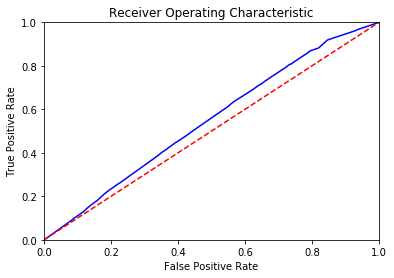

In [250]:
# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(y_test, probs)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [251]:
#assign the probability of churn to each user
index_y = y_test.index
churnRate = pd.DataFrame(probs, index=index_y)
E= pd.merge(y_test, churnRate, left_index=True, right_index=True)
October_churnRate = pd.merge(X, E,  left_index=True, right_index=True, how='inner')
October_churnRate['churnRate'] =October_churnRate[0]
October_churnRate = October_churnRate.drop([0],axis = 1).reset_index()

In [252]:
#assign predicted churn to each user with threshold of 0.5
threshold = 0.5
predicted = (probs >= threshold).astype('int')
accuracy = accuracy_score(y_test, predicted)
index_y = y_test.index
B = pd.DataFrame(predicted, index=index_y)

C= pd.merge(y_test, B, left_index=True, right_index=True)
October_predictedChurn = pd.merge(X, C,  left_index=True, right_index=True, how='inner')
October_predictedChurn['predicted churn'] = October_predictedChurn[0]
October_predictedChurn = October_predictedChurn.drop([0],axis = 1)

In [253]:
monthly_price = October_churnRate.groupby('subid04')['monthly_price'].sum().reset_index()
monthly_price['monthly_price02'] = monthly_price['monthly_price']
monthly_price = monthly_price.drop(['monthly_price'],axis = 1)
October_churnRate02 = pd.merge(October_churnRate,monthly_price,left_on='subid04', right_on= 'subid04', how = 'inner')
October_churnRate02 = October_churnRate02.drop(['monthly_price'], axis = 1)
October_churnRate02['monthly_price'] = October_churnRate02['monthly_price02']
October_churnRate02 = October_churnRate02.drop(['monthly_price02'], axis = 1)
October = October_churnRate02.groupby('subid04')['monthly_price','churnRate','CAC'].mean().reset_index()

In [254]:
October['clv'] = October['monthly_price']*1.1/(0.1+October['churnRate'])-October['CAC']
October['clv'].sum()/len(October['clv'])


102.87601133875907

# 4.6 Building Churn Model and calculated CLV for November

In [255]:
df02_November['CAC'] = 48351/len(df02_November['subid04'])

/Users/luwenlei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [256]:
df02_November= df02_November[['preferred_genre','intended_use', 'retarget_TF','num_weekly_services_utilized', 'weekly_consumption_hour',
            'app_opens', 'cust_service_mssgs', 'num_videos_rated', 'churn','subid04', 'CAC','monthly_price']]

categoriacal_features = ['preferred_genre','intended_use', 'retarget_TF']
numerical_features = ['num_weekly_services_utilized', 'weekly_consumption_hour', 
            'app_opens', 'cust_service_mssgs', 'num_videos_rated']


In [257]:
##get dummy
df02_November['retarget_TF'] = df02_November['retarget_TF'].astype('object')

In [258]:
##get dummy


df02_November02 = df02_November.drop(categoriacal_features,axis=1)

for feature in categoriacal_features:
    dummy = pd.get_dummies(df02_November[categoriacal_features])
df02_November02 = pd.concat( [df02_November02, dummy], axis = 1 )


In [259]:
#transfer the 'churn'column type
df02_November03 = df02_November02
df02_November03["churn"] = df02_November03 ["churn"].astype(int)
df02_November03

,num_weekly_services_utilized,weekly_consumption_hour,app_opens,cust_service_mssgs,num_videos_rated,churn,subid04,CAC,monthly_price,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,intended_use_access to exclusive content,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,retarget_TF_False,retarget_TF_True
1727259,2.302460,27.301448,1.0,0.0,0.0,1,20793943,0.079593,4.7343,0,0,1,0,0,0,0,0,0,0,1,0,1,0
1727273,4.299600,31.651317,2.0,0.0,0.0,0,28246157,0.079593,4.7343,1,0,0,0,0,0,0,0,0,0,0,1,1,0
1727297,4.299600,31.651317,2.0,0.0,0.0,1,28246157,0.079593,4.7343,1,0,0,0,0,0,0,0,0,0,0,1,1,0
1727321,2.998568,25.851492,2.0,0.0,0.0,1,27167836,0.079593,4.7343,1,0,0,0,0,1,0,0,0,0,0,0,1,0
1727323,2.583768,25.851492,1.0,0.0,0.0,1,20069300,0.079593,4.7343,1,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4549723,2.581714,28.751405,0.0,0.0,0.0,1,20059042,0.079593,4.7343,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4550088,3.539626,27.997724,0.0,0.0,0.0,0,21738785,0.079593,4.7343,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4550193,3.539626,27.997724,0.0,0.0,0.0,0,21738785,0.079593,4.7343,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4550298,3.539626,27.997724,0.0,0.0,0.0,0,21738785,0.079593,4.7343,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [260]:
df = df02_November03.reset_index(drop = True)

In [261]:
#train test split
X = df.drop('churn', axis = 1)
y= df['churn']
X_noid = X.drop(['subid04','CAC','monthly_price'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X_noid, y, test_size = .3,stratify = y, random_state = 30)
#Standardization
sc = StandardScaler() 
X_train_= sc.fit_transform(X_train) 
X_test= sc.transform(X_test) 
# Instantiate the classifier 
clf = RandomForestClassifier(n_estimators=200) 
# Fit to the training data 
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [262]:
# Predict the labels for the test set 
y_pred = clf.predict(X_test) 
accuracy_score(y_test, y_pred) 
# predict probabilities
probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate scores
auc = roc_auc_score(y_test, probs)
# summarize scores
print('LROC AUC=%.3f' % (auc))

LROC AUC=0.524


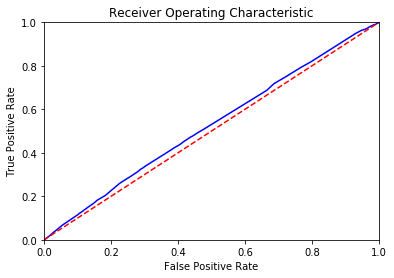

In [263]:
# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(y_test, probs)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [264]:
#assign the probability of churn to each user
index_y = y_test.index
churnRate = pd.DataFrame(probs, index=index_y)
E= pd.merge(y_test, churnRate, left_index=True, right_index=True)
November_churnRate = pd.merge(X, E,  left_index=True, right_index=True, how='inner')
November_churnRate['churnRate'] =November_churnRate[0]
November_churnRate = November_churnRate.drop([0],axis = 1).reset_index()

In [265]:
#assign predicted churn to each user with threshold of 0.5
threshold = 0.5
predicted = (probs >= threshold).astype('int')
accuracy = accuracy_score(y_test, predicted)
index_y = y_test.index
B = pd.DataFrame(predicted, index=index_y)

C= pd.merge(y_test, B, left_index=True, right_index=True)
November_predictedChurn = pd.merge(X, C,  left_index=True, right_index=True, how='inner')
November_predictedChurn['predicted churn'] = November_predictedChurn[0]
November_predictedChurn = November_predictedChurn.drop([0],axis = 1)

In [266]:
monthly_price = November_churnRate.groupby('subid04')['monthly_price'].sum().reset_index()
monthly_price['monthly_price02'] = monthly_price['monthly_price']
monthly_price = monthly_price.drop(['monthly_price'],axis = 1)
November_churnRate02 = pd.merge(November_churnRate,monthly_price,left_on='subid04', right_on= 'subid04', how = 'inner')
November_churnRate02 = November_churnRate02.drop(['monthly_price'], axis = 1)
November_churnRate02['monthly_price'] = November_churnRate02['monthly_price02']
November_churnRate02 = November_churnRate02.drop(['monthly_price02'], axis = 1)
November = November_churnRate02.groupby('subid04')['monthly_price','churnRate','CAC'].mean().reset_index()

In [267]:
November['clv'] = November['monthly_price']*1.1/(0.1+November['churnRate'])-November['CAC']
November['clv'].sum()/len(November['clv'])


69.53088930179759

# 4.7 Building Churn Model and calculated CLV for December

In [268]:
df02_December['CAC'] = 48123/len(df02_December['subid04'])

/Users/luwenlei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [269]:
df02_December= df02_December[['preferred_genre','intended_use', 'retarget_TF','num_weekly_services_utilized', 'weekly_consumption_hour',
            'app_opens', 'cust_service_mssgs', 'num_videos_rated', 'churn','subid04', 'CAC','monthly_price']]

categoriacal_features = ['preferred_genre','intended_use', 'retarget_TF']
numerical_features = ['num_weekly_services_utilized', 'weekly_consumption_hour', 
            'app_opens', 'cust_service_mssgs', 'num_videos_rated']


In [270]:
##get dummy
df02_December['retarget_TF'] = df02_December['retarget_TF'].astype('object')

In [271]:
##get dummy


df02_December02 = df02_December.drop(categoriacal_features,axis=1)

for feature in categoriacal_features:
    dummy = pd.get_dummies(df02_December[categoriacal_features])
df02_December02 = pd.concat( [df02_December02, dummy], axis = 1 )


In [272]:
#transfer the 'churn'column type
df02_December03 = df02_December02
df02_December03["churn"] = df02_December03 ["churn"].astype(int)
df02_December03

,num_weekly_services_utilized,weekly_consumption_hour,app_opens,cust_service_mssgs,num_videos_rated,churn,subid04,CAC,monthly_price,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,intended_use_access to exclusive content,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,retarget_TF_False,retarget_TF_True
1288430,2.685392,28.751405,1.0,0.0,0.0,0,25202395,0.067731,4.7343,0,1,0,0,0,0,0,0,0,0,1,0,1,0
1288473,2.685392,28.751405,1.0,0.0,0.0,1,25202395,0.067731,4.7343,0,1,0,0,0,0,0,0,0,0,1,0,1,0
1288516,2.753142,27.301448,1.0,0.0,0.0,1,26357434,0.067731,4.7343,1,0,0,0,0,1,0,0,0,0,0,0,1,0
1288523,2.998568,25.851492,2.0,0.0,0.0,1,26968546,0.067731,4.7343,1,0,0,0,0,0,0,0,0,0,1,0,1,0
1288527,2.998568,27.301448,1.0,0.0,0.0,1,26390960,0.067731,4.7343,1,0,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4421839,2.998568,27.997724,0.0,0.0,0.0,1,26311497,0.067731,1.0643,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4421840,2.998568,27.997724,0.0,0.0,0.0,1,26311497,0.067731,1.0643,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4421841,2.998568,27.997724,1.0,0.0,0.0,1,26311497,0.067731,1.0643,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4421842,2.998568,27.997724,0.0,0.0,0.0,1,26311497,0.067731,1.0643,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [273]:
df = df02_December03.reset_index(drop = True)

In [274]:
#train test split
X = df.drop('churn', axis = 1)
y= df['churn']
X_noid = X.drop(['subid04','CAC','monthly_price'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X_noid, y, test_size = .3,stratify = y, random_state = 30)
#Standardization
sc = StandardScaler() 
X_train_= sc.fit_transform(X_train) 
X_test= sc.transform(X_test) 
# Instantiate the classifier 
clf = RandomForestClassifier(n_estimators=200) 
# Fit to the training data 
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [275]:
# Predict the labels for the test set 
y_pred = clf.predict(X_test) 
accuracy_score(y_test, y_pred) 
# predict probabilities
probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate scores
auc = roc_auc_score(y_test, probs)
# summarize scores
print('LROC AUC=%.3f' % (auc))

LROC AUC=0.500


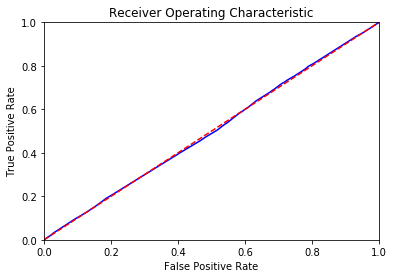

In [276]:
# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(y_test, probs)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [277]:
#assign the probability of churn to each user
index_y = y_test.index
churnRate = pd.DataFrame(probs, index=index_y)
E= pd.merge(y_test, churnRate, left_index=True, right_index=True)
December_churnRate = pd.merge(X, E,  left_index=True, right_index=True, how='inner')
December_churnRate['churnRate'] =December_churnRate[0]
December_churnRate = December_churnRate.drop([0],axis = 1).reset_index()

In [278]:
#assign predicted churn to each user with threshold of 0.5
threshold = 0.5
predicted = (probs >= threshold).astype('int')
accuracy = accuracy_score(y_test, predicted)
index_y = y_test.index
B = pd.DataFrame(predicted, index=index_y)

C= pd.merge(y_test, B, left_index=True, right_index=True)
December_predictedChurn = pd.merge(X, C,  left_index=True, right_index=True, how='inner')
December_predictedChurn['predicted churn'] = December_predictedChurn[0]
December_predictedChurn = December_predictedChurn.drop([0],axis = 1)

In [279]:
monthly_price = December_churnRate.groupby('subid04')['monthly_price'].sum().reset_index()
monthly_price['monthly_price02'] = monthly_price['monthly_price']
monthly_price = monthly_price.drop(['monthly_price'],axis = 1)
December_churnRate02 = pd.merge(December_churnRate,monthly_price,left_on='subid04', right_on= 'subid04', how = 'inner')
December_churnRate02 = December_churnRate02.drop(['monthly_price'], axis = 1)
December_churnRate02['monthly_price'] = December_churnRate02['monthly_price02']
December_churnRate02 = December_churnRate02.drop(['monthly_price02'], axis = 1)
December = December_churnRate02.groupby('subid04')['monthly_price','churnRate','CAC'].mean().reset_index()

In [280]:
December['clv'] = December['monthly_price']*1.1/(0.1+December['churnRate'])-December['CAC']
December['clv'].sum()/len(December['clv'])


69.1096121104405

# 4.8 Building Churn Model and calculated CLV for January

In [281]:
df02_January['CAC'] = 47970/len(df02_January['subid04'])

/Users/luwenlei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [282]:
df02_January= df02_January[['preferred_genre','intended_use', 'retarget_TF','num_weekly_services_utilized', 'weekly_consumption_hour',
            'app_opens', 'cust_service_mssgs', 'num_videos_rated', 'churn','subid04', 'CAC','monthly_price']]

categoriacal_features = ['preferred_genre','intended_use', 'retarget_TF']
numerical_features = ['num_weekly_services_utilized', 'weekly_consumption_hour', 
            'app_opens', 'cust_service_mssgs', 'num_videos_rated']


In [283]:
##get dummy
df02_January['retarget_TF'] = df02_January['retarget_TF'].astype('object')

In [284]:
##get dummy


df02_January02 = df02_January.drop(categoriacal_features,axis=1)

for feature in categoriacal_features:
    dummy = pd.get_dummies(df02_January[categoriacal_features])
df02_January02 = pd.concat( [df02_January02, dummy], axis = 1 )


In [285]:
#transfer the 'churn'column type
df02_January03 = df02_January02
df02_January03["churn"] = df02_January03 ["churn"].astype(int)
df02_January03

,num_weekly_services_utilized,weekly_consumption_hour,app_opens,cust_service_mssgs,num_videos_rated,churn,subid04,CAC,monthly_price,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,intended_use_access to exclusive content,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,retarget_TF_False,retarget_TF_True
1019987,2.998568,27.997724,1.0,2.0,0.0,0,23901648,0.089588,4.7343,1,0,0,0,0,1,0,0,0,0,0,0,1,0
1020033,2.998568,27.997724,1.0,2.0,0.0,1,23901648,0.089588,4.7343,1,0,0,0,0,1,0,0,0,0,0,0,1,0
1020079,2.998568,27.997724,1.0,1.0,0.0,0,29289133,0.089588,4.7343,0,1,0,0,0,0,0,0,0,0,1,0,1,0
1020111,2.998568,27.997724,1.0,1.0,0.0,1,29289133,0.089588,4.7343,0,1,0,0,0,0,0,0,0,0,1,0,1,0
1020143,2.998568,27.997724,1.0,1.0,0.0,0,26316841,0.089588,4.7343,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2799698,2.998568,27.997724,1.0,0.0,0.0,0,24314659,0.089588,4.7343,1,0,0,0,0,0,0,0,0,0,1,0,1,0
2799774,2.998568,27.997724,1.0,0.0,0.0,1,24314659,0.089588,4.7343,1,0,0,0,0,0,0,0,0,0,1,0,1,0
2800225,2.464469,18.601711,1.0,0.0,0.0,0,28666557,0.089588,4.7343,0,0,1,0,0,0,0,0,0,0,1,0,1,0
2800301,2.464469,18.601711,1.0,0.0,0.0,0,28666557,0.089588,4.7343,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [286]:
df = df02_January03.reset_index(drop = True)

In [287]:
#train test split
X = df.drop('churn', axis = 1)
y= df['churn']
X_noid = X.drop(['subid04','CAC','monthly_price'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X_noid, y, test_size = .3,stratify = y, random_state = 30)
#Standardization
sc = StandardScaler() 
X_train_= sc.fit_transform(X_train) 
X_test= sc.transform(X_test) 
# Instantiate the classifier 
clf = RandomForestClassifier(n_estimators=200) 
# Fit to the training data 
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [288]:
# Predict the labels for the test set 
y_pred = clf.predict(X_test) 
accuracy_score(y_test, y_pred) 
# predict probabilities
probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate scores
auc = roc_auc_score(y_test, probs)
# summarize scores
print('LROC AUC=%.3f' % (auc))

LROC AUC=0.504


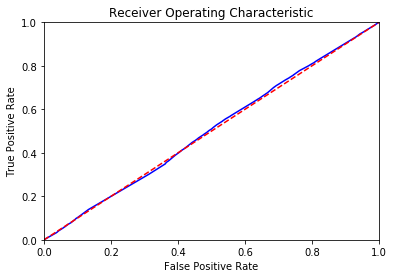

In [289]:
# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(y_test, probs)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [290]:
#assign the probability of churn to each user
index_y = y_test.index
churnRate = pd.DataFrame(probs, index=index_y)
E= pd.merge(y_test, churnRate, left_index=True, right_index=True)
January_churnRate = pd.merge(X, E,  left_index=True, right_index=True, how='inner')
January_churnRate['churnRate'] =January_churnRate[0]
January_churnRate = January_churnRate.drop([0],axis = 1).reset_index()

In [291]:
#assign predicted churn to each user with threshold of 0.5
threshold = 0.5
predicted = (probs >= threshold).astype('int')
accuracy = accuracy_score(y_test, predicted)
index_y = y_test.index
B = pd.DataFrame(predicted, index=index_y)

C= pd.merge(y_test, B, left_index=True, right_index=True)
January_predictedChurn = pd.merge(X, C,  left_index=True, right_index=True, how='inner')
January_predictedChurn['predicted churn'] = January_predictedChurn[0]
January_predictedChurn = January_predictedChurn.drop([0],axis = 1)

In [292]:
monthly_price = January_churnRate.groupby('subid04')['monthly_price'].sum().reset_index()
monthly_price['monthly_price02'] = monthly_price['monthly_price']
monthly_price = monthly_price.drop(['monthly_price'],axis = 1)
January_churnRate02 = pd.merge(January_churnRate,monthly_price,left_on='subid04', right_on= 'subid04', how = 'inner')
January_churnRate02 = January_churnRate02.drop(['monthly_price'], axis = 1)
January_churnRate02['monthly_price'] = January_churnRate02['monthly_price02']
January_churnRate02 = January_churnRate02.drop(['monthly_price02'], axis = 1)
January = January_churnRate02.groupby('subid04')['monthly_price','churnRate','CAC'].mean().reset_index()

In [293]:
January['clv'] = January['monthly_price']*1.1/(0.1+January['churnRate'])-January['CAC']
January['clv'].sum()/len(January['clv'])


60.80760721738061

# 4.9 Building Churn Model and calculated CLV for February

In [294]:
df02_February['CAC'] = 48584/len(df02_February['subid04'])

/Users/luwenlei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [295]:
df02_February= df02_February[['preferred_genre','intended_use', 'retarget_TF','num_weekly_services_utilized', 'weekly_consumption_hour',
            'app_opens', 'cust_service_mssgs', 'num_videos_rated', 'churn','subid04', 'CAC','monthly_price']]

categoriacal_features = ['preferred_genre','intended_use', 'retarget_TF']
numerical_features = ['num_weekly_services_utilized', 'weekly_consumption_hour', 
            'app_opens', 'cust_service_mssgs', 'num_videos_rated']


In [296]:
##get dummy
df02_February['retarget_TF'] = df02_February['retarget_TF'].astype('object')

In [297]:
##get dummy


df02_February02 = df02_February.drop(categoriacal_features,axis=1)

for feature in categoriacal_features:
    dummy = pd.get_dummies(df02_February[categoriacal_features])
df02_February02 = pd.concat( [df02_February02, dummy], axis = 1 )


In [298]:
#transfer the 'churn'column type
df02_February03 = df02_February02
df02_February03["churn"] = df02_February03 ["churn"].astype(int)
df02_February03

,num_weekly_services_utilized,weekly_consumption_hour,app_opens,cust_service_mssgs,num_videos_rated,churn,subid04,CAC,monthly_price,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,intended_use_access to exclusive content,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,retarget_TF_False,retarget_TF_True
514928,3.760549,25.851492,1.0,0.0,0.0,1,22249456,0.131592,4.7343,1,0,0,0,0,1,0,0,0,0,0,0,1,0
514943,2.287731,27.997724,1.0,0.0,0.0,0,22948701,0.131592,4.7343,0,0,0,0,0,0,0,0,0,0,0,0,1,0
514989,2.287731,27.997724,1.0,0.0,0.0,1,22948701,0.131592,4.7343,0,0,0,0,0,0,0,0,0,0,0,0,1,0
515035,4.625093,27.301448,2.0,0.0,0.0,1,24930929,0.131592,4.7343,1,0,0,0,0,0,0,0,0,0,0,1,1,0
515039,2.921043,34.551230,1.0,0.0,0.0,1,27131548,0.131592,4.7343,1,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185908,2.998568,27.997724,0.0,0.0,0.0,0,22481146,0.131592,4.7343,1,0,0,0,0,1,0,0,0,0,0,0,1,0
2185984,2.998568,27.997724,0.0,0.0,0.0,1,22481146,0.131592,4.7343,1,0,0,0,0,1,0,0,0,0,0,0,1,0
2186124,2.998568,27.997724,0.0,0.0,0.0,0,28390931,0.131592,4.7343,1,0,0,0,0,0,0,0,0,0,1,0,1,0
2186193,2.998568,27.997724,0.0,0.0,0.0,0,28390931,0.131592,4.7343,1,0,0,0,0,0,0,0,0,0,1,0,1,0


In [299]:
df = df02_February03.reset_index(drop = True)

In [300]:
#train test split
X = df.drop('churn', axis = 1)
y= df['churn']
X_noid = X.drop(['subid04','CAC','monthly_price'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X_noid, y, test_size = .3,stratify = y, random_state = 30)
#Standardization
sc = StandardScaler() 
X_train_= sc.fit_transform(X_train) 
X_test= sc.transform(X_test) 
# Instantiate the classifier 
clf = RandomForestClassifier(n_estimators=200) 
# Fit to the training data 
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [301]:
# Predict the labels for the test set 
y_pred = clf.predict(X_test) 
accuracy_score(y_test, y_pred) 
# predict probabilities
probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate scores
auc = roc_auc_score(y_test, probs)
# summarize scores
print('LROC AUC=%.3f' % (auc))

LROC AUC=0.494


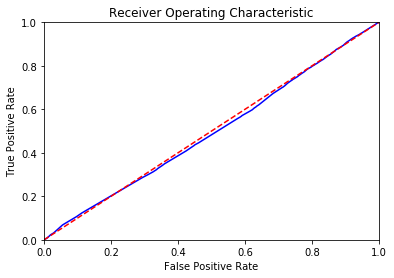

In [302]:
# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(y_test, probs)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [303]:
#assign the probability of churn to each user
index_y = y_test.index
churnRate = pd.DataFrame(probs, index=index_y)
E= pd.merge(y_test, churnRate, left_index=True, right_index=True)
February_churnRate = pd.merge(X, E,  left_index=True, right_index=True, how='inner')
February_churnRate['churnRate'] =February_churnRate[0]
February_churnRate = February_churnRate.drop([0],axis = 1).reset_index()

In [304]:
#assign predicted churn to each user with threshold of 0.5
threshold = 0.5
predicted = (probs >= threshold).astype('int')
accuracy = accuracy_score(y_test, predicted)
index_y = y_test.index
B = pd.DataFrame(predicted, index=index_y)

C= pd.merge(y_test, B, left_index=True, right_index=True)
February_predictedChurn = pd.merge(X, C,  left_index=True, right_index=True, how='inner')
February_predictedChurn['predicted churn'] = February_predictedChurn[0]
February_predictedChurn = February_predictedChurn.drop([0],axis = 1)

In [305]:
monthly_price = February_churnRate.groupby('subid04')['monthly_price'].sum().reset_index()
monthly_price['monthly_price02'] = monthly_price['monthly_price']
monthly_price = monthly_price.drop(['monthly_price'],axis = 1)
February_churnRate02 = pd.merge(February_churnRate,monthly_price,left_on='subid04', right_on= 'subid04', how = 'inner')
February_churnRate02 = February_churnRate02.drop(['monthly_price'], axis = 1)
February_churnRate02['monthly_price'] = February_churnRate02['monthly_price02']
February_churnRate02 = February_churnRate02.drop(['monthly_price02'], axis = 1)
February = February_churnRate02.groupby('subid04')['monthly_price','churnRate','CAC'].mean().reset_index()

In [306]:
February['clv'] = February['monthly_price']*1.1/(0.1+February['churnRate'])-February['CAC']
February['clv'].sum()/len(February['clv'])


35.991717326468

# 4.10 Building Churn Model and calculated CLV for March

In [307]:
df02_March['CAC'] = 48360*(len(df02_March['subid04'])/(len(df02_March['subid04'])+len(df02_April['subid04'])))/len(df02_March['subid04'])



/Users/luwenlei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [308]:
df02_March= df02_March[['preferred_genre','intended_use', 'retarget_TF','num_weekly_services_utilized', 'weekly_consumption_hour',
            'app_opens', 'cust_service_mssgs', 'num_videos_rated', 'churn','subid04', 'CAC','monthly_price']]

categoriacal_features = ['preferred_genre','intended_use', 'retarget_TF']
numerical_features = ['num_weekly_services_utilized', 'weekly_consumption_hour', 
            'app_opens', 'cust_service_mssgs', 'num_videos_rated']


In [309]:
##get dummy
df02_March['retarget_TF'] = df02_March['retarget_TF'].astype('object')

In [310]:
##get dummy


df02_March02 = df02_March.drop(categoriacal_features,axis=1)

for feature in categoriacal_features:
    dummy = pd.get_dummies(df02_March[categoriacal_features])
df02_March02 = pd.concat( [df02_March02, dummy], axis = 1 )


In [311]:
#transfer the 'churn'column type
df02_March03 = df02_March02
df02_March03["churn"] = df02_March03 ["churn"].astype(int)
df02_March03

,num_weekly_services_utilized,weekly_consumption_hour,app_opens,cust_service_mssgs,num_videos_rated,churn,subid04,CAC,monthly_price,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,intended_use_access to exclusive content,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,retarget_TF_False,retarget_TF_True
0,2.998568,30.201361,3.0,0.0,0.0,1,21697364,0.057417,4.7343,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,2.998568,30.201361,1.0,3.0,0.0,1,21697364,0.057417,4.7343,0,1,0,0,0,1,0,0,0,0,0,0,1,0
2,2.998568,30.201361,0.0,0.0,0.0,1,21697364,0.057417,4.7343,0,1,0,0,0,1,0,0,0,0,0,0,1,0
5,2.670664,28.751405,1.0,0.0,0.0,1,20407871,0.057417,4.7343,1,0,0,0,0,0,0,0,0,0,0,1,1,0
6,2.670664,28.751405,1.0,1.0,0.0,1,20407871,0.057417,4.7343,1,0,0,0,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129882,2.998568,27.997724,4.0,0.0,0.0,1,26054321,0.057417,4.7343,0,1,0,0,0,0,0,0,0,0,1,0,1,0
1129975,2.915152,30.201361,2.0,0.0,0.0,0,22990814,0.057417,4.7343,0,0,0,0,1,1,0,0,0,0,0,0,1,0
1130021,2.915152,30.201361,2.0,0.0,0.0,1,22990814,0.057417,4.7343,0,0,0,0,1,1,0,0,0,0,0,0,1,0
1130067,2.998568,27.997724,1.0,0.0,0.0,0,20325721,0.057417,4.7343,1,0,0,0,0,1,0,0,0,0,0,0,0,1


In [312]:
df = df02_March03.reset_index(drop = True)

In [313]:
#train test split
X = df.drop('churn', axis = 1)
y= df['churn']
X_noid = X.drop(['subid04','CAC','monthly_price'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X_noid, y, test_size = .3,stratify = y, random_state = 30)
#Standardization
sc = StandardScaler() 
X_train_= sc.fit_transform(X_train) 
X_test= sc.transform(X_test) 
# Instantiate the classifier 
clf = RandomForestClassifier(n_estimators=200) 
# Fit to the training data 
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [314]:
# Predict the labels for the test set 
y_pred = clf.predict(X_test) 
accuracy_score(y_test, y_pred) 
# predict probabilities
probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate scores
auc = roc_auc_score(y_test, probs)
# summarize scores
print('LROC AUC=%.3f' % (auc))

LROC AUC=0.506


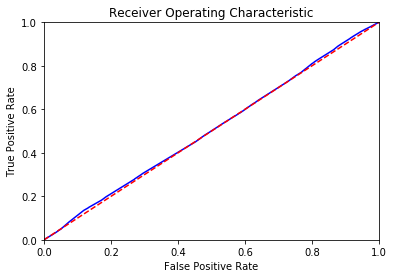

In [315]:
# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(y_test, probs)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [316]:
#assign the probability of churn to each user
index_y = y_test.index
churnRate = pd.DataFrame(probs, index=index_y)
E= pd.merge(y_test, churnRate, left_index=True, right_index=True)
March_churnRate = pd.merge(X, E,  left_index=True, right_index=True, how='inner')
March_churnRate['churnRate'] =March_churnRate[0]
March_churnRate = March_churnRate.drop([0],axis = 1).reset_index()

In [317]:
#assign predicted churn to each user with threshold of 0.5
threshold = 0.5
predicted = (probs >= threshold).astype('int')
accuracy = accuracy_score(y_test, predicted)
index_y = y_test.index
B = pd.DataFrame(predicted, index=index_y)

C= pd.merge(y_test, B, left_index=True, right_index=True)
March_predictedChurn = pd.merge(X, C,  left_index=True, right_index=True, how='inner')
March_predictedChurn['predicted churn'] = March_predictedChurn[0]
March_predictedChurn = March_predictedChurn.drop([0],axis = 1)

In [318]:
monthly_price = March_churnRate.groupby('subid04')['monthly_price'].sum().reset_index()
monthly_price['monthly_price02'] = monthly_price['monthly_price']
monthly_price = monthly_price.drop(['monthly_price'],axis = 1)
March_churnRate02 = pd.merge(March_churnRate,monthly_price,left_on='subid04', right_on= 'subid04', how = 'inner')
March_churnRate02 = March_churnRate02.drop(['monthly_price'], axis = 1)
March_churnRate02['monthly_price'] = March_churnRate02['monthly_price02']
March_churnRate02 = March_churnRate02.drop(['monthly_price02'], axis = 1)
March = March_churnRate02.groupby('subid04')['monthly_price','churnRate','CAC'].mean().reset_index()

In [319]:
March['clv'] = March['monthly_price']*1.1/(0.1+March['churnRate'])-March['CAC']
March['clv'].sum()/len(March['clv'])


44.83235960759944

# 4.11 Building Churn Model and calculated CLV for April

In [320]:
df02_April['CAC'] = 48360*(len(df02_April['subid04'])/(len(df02_March['subid04'])+len(df02_April['subid04'])))/len(df02_April['subid04'])


/Users/luwenlei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [321]:
df02_April= df02_April[['preferred_genre','intended_use', 'retarget_TF','num_weekly_services_utilized', 'weekly_consumption_hour',
            'app_opens', 'cust_service_mssgs', 'num_videos_rated', 'churn','subid04', 'CAC','monthly_price']]

categoriacal_features = ['preferred_genre','intended_use', 'retarget_TF']
numerical_features = ['num_weekly_services_utilized', 'weekly_consumption_hour', 
            'app_opens', 'cust_service_mssgs', 'num_videos_rated']


In [322]:
##get dummy
df02_April['retarget_TF'] = df02_April['retarget_TF'].astype('object')

In [323]:
##get dummy


df02_April02 = df02_April.drop(categoriacal_features,axis=1)

for feature in categoriacal_features:
    dummy = pd.get_dummies(df02_April[categoriacal_features])
df02_April02 = pd.concat( [df02_April02, dummy], axis = 1 )


In [324]:
#transfer the 'churn'column type
df02_April03 = df02_April02
df02_April03["churn"] = df02_April03 ["churn"].astype(int)
df02_April03

,num_weekly_services_utilized,weekly_consumption_hour,app_opens,cust_service_mssgs,num_videos_rated,churn,subid04,CAC,monthly_price,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,intended_use_access to exclusive content,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,retarget_TF_False,retarget_TF_True
3,2.998568,30.201361,1.0,1.0,0.0,1,21697364,0.057417,4.7343,0,1,0,0,0,1,0,0,0,0,0,1,0
4,2.998568,30.201361,1.0,1.0,0.0,1,21697364,0.057417,4.7343,0,1,0,0,0,1,0,0,0,0,0,1,0
10,2.670664,28.751405,0.0,1.0,0.0,1,20407871,0.057417,4.7343,1,0,0,0,0,0,0,0,0,0,1,1,0
16,4.423316,30.201361,7.0,1.0,0.0,1,27818002,0.057417,4.7343,0,1,0,0,0,1,0,0,0,0,0,1,0
17,4.423316,30.201361,4.0,0.0,0.0,1,27818002,0.057417,4.7343,0,1,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814557,3.384980,37.451142,0.0,0.0,0.0,1,26544681,0.057417,4.7343,0,1,0,0,0,1,0,0,0,0,0,1,0
814798,3.171422,25.851492,2.0,0.0,0.0,0,25961468,0.057417,4.7343,0,1,0,0,0,0,0,0,0,1,0,1,0
814844,3.171422,25.851492,2.0,0.0,0.0,1,25961468,0.057417,4.7343,0,1,0,0,0,0,0,0,0,1,0,1,0
814889,2.998568,27.997724,2.0,0.0,0.0,0,22460908,0.057417,4.7343,1,0,0,0,0,0,0,0,0,1,0,0,1


In [325]:
df = df02_April03.reset_index(drop = True)

In [326]:
#train test split
X = df.drop('churn', axis = 1)
y= df['churn']
X_noid = X.drop(['subid04','CAC','monthly_price'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X_noid, y, test_size = .3,stratify = y, random_state = 30)
#Standardization
sc = StandardScaler() 
X_train_= sc.fit_transform(X_train) 
X_test= sc.transform(X_test) 
# Instantiate the classifier 
clf = RandomForestClassifier(n_estimators=200) 
# Fit to the training data 
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [327]:
# Predict the labels for the test set 
y_pred = clf.predict(X_test) 
accuracy_score(y_test, y_pred) 
# predict probabilities
probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate scores
auc = roc_auc_score(y_test, probs)
# summarize scores
print('LROC AUC=%.3f' % (auc))

LROC AUC=0.498


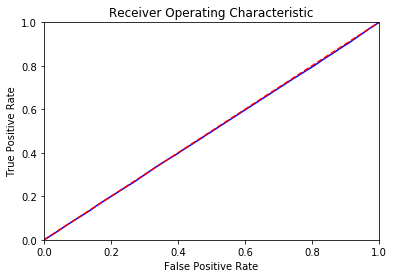

In [328]:
# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(y_test, probs)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [329]:
#assign the probability of churn to each user
index_y = y_test.index
churnRate = pd.DataFrame(probs, index=index_y)
E= pd.merge(y_test, churnRate, left_index=True, right_index=True)
April_churnRate = pd.merge(X, E,  left_index=True, right_index=True, how='inner')
April_churnRate['churnRate'] =April_churnRate[0]
April_churnRate = April_churnRate.drop([0],axis = 1).reset_index()

In [330]:
#assign predicted churn to each user with threshold of 0.5
threshold = 0.5
predicted = (probs >= threshold).astype('int')
accuracy = accuracy_score(y_test, predicted)
index_y = y_test.index
B = pd.DataFrame(predicted, index=index_y)

C= pd.merge(y_test, B, left_index=True, right_index=True)
April_predictedChurn = pd.merge(X, C,  left_index=True, right_index=True, how='inner')
April_predictedChurn['predicted churn'] = April_predictedChurn[0]
April_predictedChurn = April_predictedChurn.drop([0],axis = 1)

In [331]:
monthly_price = April_churnRate.groupby('subid04')['monthly_price'].sum().reset_index()
monthly_price['monthly_price02'] = monthly_price['monthly_price']
monthly_price = monthly_price.drop(['monthly_price'],axis = 1)
April_churnRate02 = pd.merge(April_churnRate,monthly_price,left_on='subid04', right_on= 'subid04', how = 'inner')
April_churnRate02 = April_churnRate02.drop(['monthly_price'], axis = 1)
April_churnRate02['monthly_price'] = April_churnRate02['monthly_price02']
April_churnRate02 = April_churnRate02.drop(['monthly_price02'], axis = 1)
April = April_churnRate02.groupby('subid04')['monthly_price','churnRate','CAC'].mean().reset_index()

In [332]:
April['clv'] = April['monthly_price']*1.1/(0.1+April['churnRate'])-April['CAC']
April['clv'].sum()/len(March['clv'])


22.847809199649813

# 5. Aggregate the data of each month and get the ultimate clv and churn probability

In [333]:
ALLDATA = pd.concat([June,July,August,September,October,November,December,January,February,March,April], sort=True)

In [335]:
ALLDATA02 = ALLDATA.groupby('subid04')['clv','churnRate'].mean().reset_index()

In [336]:
monthly_revenue_per_subscriber = ALLDATA02 ['clv'].sum()/len(ALLDATA02['clv'])

In [337]:
monthly_churn = ALLDATA02 ['churnRate'].sum()/len(ALLDATA02['churnRate'])

In [339]:
#monthly_revenue_per_subscriber = 49
monthly_revenue_per_subscriber

48.56329954352041

In [340]:
#monthly_churn rate = 0.63
monthly_churn

0.6324822406836815

In [342]:
ALLDATA02

,subid04,clv,churnRate
0,20000062,7.566632,0.580406
1,20000405,5.352420,0.862641
2,20000604,39.649943,0.723078
3,20000685,93.286482,0.643472
4,20000741,15.944208,0.549996
...,...,...,...
116263,29999740,39.087474,0.564680
116264,29999820,11.338527,0.812257
116265,29999822,6.446836,0.699398
116266,29999889,150.322782,0.497432


In [341]:
ALLDATA02['subid04'].nunique

<bound method IndexOpsMixin.nunique of 0         20000062
1         20000405
2         20000604
3         20000685
4         20000741
            ...   
116263    29999740
116264    29999820
116265    29999822
116266    29999889
116267    29999945
Name: subid04, Length: 116268, dtype: int64>